In [2]:
import os 
import pandas as pd 
import sys 
import re 

current_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_path,'..','..'))  # '..','..','..'
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    
from pipeline.plotting.TS_analysis import plot_TS
from jupyter_ipynb.NetMob_training_analysis.plotting import plot_boxplot_on_metric
from experiences.convert_df_to_latex import dataframe_to_latex,parse_index_exp1_2,parse_index_exp4
from experiences.convert_df_to_latex import update_df_metrics,load_csv
from experiences.convert_df_to_latex import tackle_trial_j as tackle_trial_for_distrib
from experiences.common_results import dic_exp_to_names,find_baseline,dic_trials

folder_path = '../../save/K_fold_validation/training_wo_HP_tuning'  # '../../save'


In [2]:
for exp_i,trials in dic_trials.items():
    if exp_i == 'set_experience_HERE' :#'Exp1_subway_in': #'set_experience_HERE': # set_experience_HERE # 'Exp1_subway_in'# 'Exp4_15min' # 'Exp4' # 'Exp3_bike_15min_h4' # 'Exp3' # 'Exp1'
        for trial_j in trials:
            df_j_all = pd.DataFrame()
            for n_bis in range(1,6):
                file_path = f"{folder_path}/{exp_i}/{dic_exp_to_names[exp_i]}/{trial_j}_bis{n_bis}/Losses_{trial_j}_bis{n_bis}.csv"
                df_j = pd.read_csv(file_path,index_col = 0)
                df_j.columns = [f'Train_{n_bis}',f'Valid_{n_bis}']
                df_j_all = pd.concat([df_j_all,df_j],axis=1)
            plot_TS(df_j_all,width=1500,height=400,bool_show=True,title=f"{exp_i}, {trial_j}",x_datetime = False)


In [4]:
import os 
import pandas as pd 
from pipeline.plotting.TS_analysis import plot_TS

def tackle_trial_j(folder_path,dic_exp_to_names,L_metrics,exp_i,trial_j,metrics,plot_losses):
    df_j_all = pd.DataFrame()
    metric_i = []
    for n_bis in range(1,6):
        df_j_all, metric_i = load_csv(folder_path,dic_exp_to_names,exp_i,trial_j,n_bis,df_j_all,metric_i,metrics)

    metric_i = pd.DataFrame(pd.DataFrame(metric_i).agg(['mean','std']).unstack()).T
    metric_i.index = [f"{trial_j}"]
    L_metrics.append(metric_i)
    if plot_losses:
            plot_TS(df_j_all,width=1500,height=400,bool_show=True,title=f"{exp_i}, {trial_j}",x_datetime = False)
    return L_metrics

folder_path = '../../save/K_fold_validation/training_wo_HP_tuning' # ../../
metrics = ['rmse','mae','mase']
plot_losses = False 


for exp_i,trials in dic_trials.items():
    if exp_i == 'Exp2_rainy':
        continue
    print(f"\n------------------ {exp_i} ---")
    L_metrics = []
    if exp_i == 'Exp4_15min_h1':
        exp_i_tmp = 'Exp4_15min'
    else:
        exp_i_tmp = exp_i

    for trial_j in trials:
        L_metrics = tackle_trial_j(folder_path,dic_exp_to_names,L_metrics,exp_i_tmp,trial_j,metrics,plot_losses)

    if exp_i == 'Exp2':
        exp_i_tmp = 'Exp3_bike_15min_h4'
        trial_j = 'STAEformer_bike_out_calendar__e200_h4'
        L_metrics = tackle_trial_j(folder_path,dic_exp_to_names,L_metrics,exp_i_tmp,trial_j,metrics,plot_losses)

    if exp_i == 'Exp3_bike_15min_h4':
        exp_i_tmp = 'Exp4_15min'
        trial_j = 'STAEformer_bike_out_calendar__e80_h4'
        L_metrics = tackle_trial_j(folder_path,dic_exp_to_names,L_metrics,exp_i_tmp,trial_j,metrics,plot_losses)
    df_metrics_all = pd.concat(L_metrics)

    horizons = list(set([c[0].split('_')[-1][1:] for c in df_metrics_all.columns]))
    for horizon in horizons:
        df_horizon = df_metrics_all[[c for c in df_metrics_all.columns if c[0].endswith(f"_h{horizon}")]].dropna()

        globals()[f"df_metrics_{exp_i}_h{horizon}"] = df_horizon.sort_values(by=[(f'rmse_h{horizon}','mean')])

        baseline_index = find_baseline(exp_i,h=horizon)
        for c in globals()[f"df_metrics_{exp_i}_h{horizon}"].columns:
            if 'mean' == c[1]:
                globals()[f"df_metrics_{exp_i}_h{horizon}"][c] = globals()[f"df_metrics_{exp_i}_h{horizon}"][c].apply(lambda x: f"{round(x,2)} ({round(100*(-1+x/globals()[f'df_metrics_{exp_i}_h{horizon}'].loc[baseline_index,c]),2)}\%)")
        
        display(globals()[f"df_metrics_{exp_i}_h{horizon}"])



------------------ Exp1_subway_in ---


rmse_h4            \
                                                               mean       std   
STAEformer_subway_in_subway_out_calendar_late_f...  44.09 (-1.23\%)  0.465219   
STAEformer_subway_in_subway_out_calendar_late_f...  44.17 (-1.05\%)  0.444862   
STAEformer_subway_in_subway_out_calendar_early_...  44.22 (-0.93\%)  0.452206   
STAEformer_subway_in_subway_out_calendar_late_f...  44.44 (-0.44\%)  0.391122   
STAEformer_subway_in_subway_out_calendar_early_...  44.57 (-0.16\%)  0.653885   
STAEformer_subway_in_calendar__e80_h4                 44.64 (0.0\%)  0.749028   
STAEformer_subway_in_subway_out_calendar_late_f...   44.64 (0.01\%)  0.311228   
STAEformer_subway_in_subway_out_calendar_early_...   44.68 (0.09\%)  0.449618   
STAEformer_subway_in_subway_out_calendar_early_...   44.71 (0.16\%)  0.616244   
STAEformer_subway_in_subway_out_calendar_early_...   44.85 (0.48\%)  0.511583   
STAEformer_subway_in_subway_out_calendar_early_...   44.87 (0.52\%)  0.475858   
STAEformer_subway_in_subway_out_calendar_late_f...   44.87 (0.53\%)  0.649576   
STAEformer_subway_in_subway_out_calendar_early_...    44.9 (0.58\%)  0.355340   
STAEformer_subway_in_subway_out_calendar_early_...   44.97 (0.76\%)  0.850792   
STAEformer_subway_in_subway_out_calendar_late_f...   45.33 (1.56\%)  0.969149   

                                                             mae_h4            \
                                                               mean       std   
STAEformer_subway_in_subway_out_calendar_late_f...  23.79 (-1.05\%)  0.297099   
STAEformer_subway_in_subway_out_calendar_late_f...  23.86 (-0.76\%)  0.273204   
STAEformer_subway_in_subway_out_calendar_early_...  23.84 (-0.82\%)  0.275521   
STAEformer_subway_in_subway_out_calendar_late_f...  23.96 (-0.31\%)  0.226310   
STAEformer_subway_in_subway_out_calendar_early_...  23.98 (-0.25\%)  0.399274   
STAEformer_subway_in_calendar__e80_h4                 24.04 (0.0\%)  0.235967   
STAEformer_subway_in_subway_out_calendar_late_f...  23.99 (-0.19\%)  0.129404   
STAEformer_subway_in_subway_out_calendar_early_...  23.91 (-0.55\%)  0.157793   
STAEformer_subway_in_subway_out_calendar_early_...  24.02 (-0.07\%)  0.256309   
STAEformer_subway_in_subway_out_calendar_early_...    24.04 (0.0\%)  0.300061   
STAEformer_subway_in_subway_out_calendar_early_...  24.03 (-0.05\%)  0.181445   
STAEformer_subway_in_subway_out_calendar_late_f...  23.98 (-0.25\%)  0.286581   
STAEformer_subway_in_subway_out_calendar_early_...    24.1 (0.27\%)  0.156948   
STAEformer_subway_in_subway_out_calendar_early_...    24.18 (0.6\%)  0.423145   
STAEformer_subway_in_subway_out_calendar_late_f...   24.25 (0.87\%)  0.429083   

                                                           mase_h4            
                                                              mean       std  
STAEformer_subway_in_subway_out_calendar_late_f...  0.71 (-1.05\%)  0.008906  
STAEformer_subway_in_subway_out_calendar_late_f...  0.71 (-0.76\%)  0.008177  
STAEformer_subway_in_subway_out_calendar_early_...  0.71 (-0.82\%)  0.008238  
STAEformer_subway_in_subway_out_calendar_late_f...  0.72 (-0.31\%)  0.006774  
STAEformer_subway_in_subway_out_calendar_early_...  0.72 (-0.25\%)  0.011965  
STAEformer_subway_in_calendar__e80_h4                 0.72 (0.0\%)  0.007073  
STAEformer_subway_in_subway_out_calendar_late_f...  0.72 (-0.19\%)  0.003872  
STAEformer_subway_in_subway_out_calendar_early_...  0.72 (-0.55\%)  0.004733  
STAEformer_subway_in_subway_out_calendar_early_...  0.72 (-0.07\%)  0.007685  
STAEformer_subway_in_subway_out_calendar_early_...   0.72 (-0.0\%)  0.008994  
STAEformer_subway_in_subway_out_calendar_early_...  0.72 (-0.05\%)  0.005423  
STAEformer_subway_in_subway_out_calendar_late_f...  0.72 (-0.25\%)  0.008583  
STAEformer_subway_in_subway_out_calendar_early_...   0.72 (0.27\%)  0.004703  
STAEformer_subway_in_subway_out_calendar_early_...    0.72 (0.6\%)  0.012667  
STAEformer_subway_in_subway_out_calendar

rmse_h1            \
                                                               mean       std   
STAEformer_subway_in_subway_out_calendar_early_...  35.48 (-0.33\%)  0.135227   
STAEformer_subway_in_subway_out_calendar_late_f...  35.58 (-0.04\%)  0.059006   
STAEformer_subway_in_calendar__e80_h1                  35.6 (0.0\%)  0.228636   
STAEformer_subway_in_subway_out_calendar_early_...   35.62 (0.08\%)  0.178211   
STAEformer_subway_in_subway_out_calendar_late_f...   35.65 (0.15\%)  0.232848   
STAEformer_subway_in_subway_out_calendar_late_f...   35.77 (0.48\%)  0.198439   
STAEformer_subway_in_subway_out_calendar_early_...   35.78 (0.51\%)  0.203069   
STAEformer_subway_in_subway_out_calendar_early_...   35.78 (0.52\%)  0.326888   
STAEformer_subway_in_subway_out_calendar_late_f...   35.78 (0.52\%)  0.185853   
STAEformer_subway_in_subway_out_calendar_late_f...   35.83 (0.65\%)  0.258495   
STAEformer_subway_in_subway_out_calendar_late_f...   35.86 (0.73\%)  0.181671   
STAEformer_subway_in_subway_out_calendar_early_...    35.88 (0.8\%)  0.133729   
STAEformer_subway_in_subway_out_calendar_early_...   35.95 (0.98\%)  0.174882   
STAEformer_subway_in_subway_out_calendar_early_...    35.95 (1.0\%)  0.087887   
STAEformer_subway_in_subway_out_calendar_early_...   36.04 (1.26\%)  0.382746   

                                                             mae_h1            \
                                                               mean       std   
STAEformer_subway_in_subway_out_calendar_early_...  20.36 (-0.17\%)  0.033285   
STAEformer_subway_in_subway_out_calendar_late_f...  20.37 (-0.11\%)  0.045057   
STAEformer_subway_in_calendar__e80_h1                 20.39 (0.0\%)  0.154526   
STAEformer_subway_in_subway_out_calendar_early_...  20.38 (-0.08\%)  0.137855   
STAEformer_subway_in_subway_out_calendar_late_f...   20.49 (0.49\%)  0.160206   
STAEformer_subway_in_subway_out_calendar_late_f...   20.53 (0.65\%)  0.131922   
STAEformer_subway_in_subway_out_calendar_early_...  20.36 (-0.14\%)  0.092017   
STAEformer_subway_in_subway_out_calendar_early_...   20.49 (0.48\%)  0.155233   
STAEformer_subway_in_subway_out_calendar_late_f...   20.49 (0.48\%)  0.075744   
STAEformer_subway_in_subway_out_calendar_late_f...   20.51 (0.59\%)  0.129991   
STAEformer_subway_in_subway_out_calendar_late_f...    20.54 (0.7\%)  0.046128   
STAEformer_subway_in_subway_out_calendar_early_...   20.55 (0.78\%)  0.100583   
STAEformer_subway_in_subway_out_calendar_early_...   20.61 (1.04\%)  0.088788   
STAEformer_subway_in_subway_out_calendar_early_...    20.5 (0.51\%)  0.056700   
STAEformer_subway_in_subway_out_calendar_early_...   20.54 (0.72\%)  0.100518   

                                                           mase_h1            
                                                              mean       std  
STAEformer_subway_in_subway_out_calendar_early_...  0.61 (-0.17\%)  0.000994  
STAEformer_subway_in_subway_out_calendar_late_f...  0.61 (-0.11\%)  0.001350  
STAEformer_subway_in_calendar__e80_h1                 0.61 (0.0\%)  0.004623  
STAEformer_subway_in_subway_out_calendar_early_...  0.61 (-0.07\%)  0.004132  
STAEformer_subway_in_subway_out_calendar_late_f...   0.61 (0.49\%)  0.004799  
STAEformer_subway_in_subway_out_calendar_late_f...   0.61 (0.65\%)  0.003950  
STAEformer_subway_in_subway_out_calendar_early_...  0.61 (-0.14\%)  0.002758  
STAEformer_subway_in_subway_out_calendar_early_...   0.61 (0.48\%)  0.004646  
STAEformer_subway_in_subway_out_calendar_late_f...   0.61 (0.48\%)  0.002267  
STAEformer_subway_in_subway_out_calendar_late_f...   0.61 (0.59\%)  0.003896  
STAEformer_subway_in_subway_out_calendar_late_f...    0.61 (0.7\%)  0.001379  
STAEformer_subway_in_subway_out_calendar_early_...   0.62 (0.78\%)  0.003015  
STAEformer_subway_in_subway_out_calendar_early_...   0.62 (1.04\%)  0.002652  
STAEformer_subway_in_subway_out_calendar_early_...   0.61 (0.51\%)  0.001700  
STAEformer_subway_in_subway_out_calendar


------------------ Exp1_subway_out ---


rmse_h4            \
                                                               mean       std   
STAEformer_subway_out_subway_in_calendar_early_...  40.59 (-4.14\%)  0.565579   
STAEformer_subway_out_subway_in_calendar_early_...  40.81 (-3.63\%)  0.313657   
STAEformer_subway_out_subway_in_calendar_early_...  40.82 (-3.61\%)  0.276673   
STAEformer_subway_out_subway_in_calendar_early_...  40.88 (-3.45\%)  0.292779   
STAEformer_subway_out_subway_in_calendar_early_...  40.98 (-3.22\%)  0.344263   
STAEformer_subway_out_subway_in_calendar_early_...   41.0 (-3.18\%)  0.200877   
STAEformer_subway_out_subway_in_calendar_late_f...  41.09 (-2.97\%)  0.221178   
STAEformer_subway_out_subway_in_calendar_early_...  41.11 (-2.91\%)  0.184949   
STAEformer_subway_out_subway_in_calendar_early_...  41.15 (-2.82\%)  0.464408   
STAEformer_subway_out_subway_in_calendar_late_f...  41.22 (-2.66\%)  0.338721   
STAEformer_subway_out_subway_in_calendar_late_f...  41.25 (-2.57\%)  0.409030   
STAEformer_subway_out_subway_in_calendar_late_f...   41.41 (-2.2\%)  0.359456   
STAEformer_subway_out_subway_in_calendar_late_f...  41.88 (-1.09\%)  0.500659   
STAEformer_subway_out_subway_in_calendar_late_f...  41.89 (-1.06\%)  0.148227   
STAEformer_subway_out_calendar__e80_h4                42.34 (0.0\%)  0.367245   

                                                             mae_h4            \
                                                               mean       std   
STAEformer_subway_out_subway_in_calendar_early_...   22.18 (-3.7\%)  0.180961   
STAEformer_subway_out_subway_in_calendar_early_...  22.55 (-2.08\%)  0.218737   
STAEformer_subway_out_subway_in_calendar_early_...   22.2 (-3.58\%)  0.113721   
STAEformer_subway_out_subway_in_calendar_early_...  22.29 (-3.21\%)  0.155751   
STAEformer_subway_out_subway_in_calendar_early_...  22.27 (-3.29\%)  0.112693   
STAEformer_subway_out_subway_in_calendar_early_...  22.25 (-3.37\%)  0.065036   
STAEformer_subway_out_subway_in_calendar_late_f...  22.54 (-2.12\%)  0.151886   
STAEformer_subway_out_subway_in_calendar_early_...  22.55 (-2.06\%)  0.119015   
STAEformer_subway_out_subway_in_calendar_early_...   22.31 (-3.1\%)  0.233828   
STAEformer_subway_out_subway_in_calendar_late_f...  22.58 (-1.94\%)  0.204056   
STAEformer_subway_out_subway_in_calendar_late_f...  22.66 (-1.58\%)  0.151046   
STAEformer_subway_out_subway_in_calendar_late_f...    22.7 (-1.4\%)  0.229415   
STAEformer_subway_out_subway_in_calendar_late_f...  22.85 (-0.75\%)  0.205196   
STAEformer_subway_out_subway_in_calendar_late_f...  22.95 (-0.32\%)  0.108604   
STAEformer_subway_out_calendar__e80_h4                23.03 (0.0\%)  0.209461   

                                                           mase_h4            
                                                              mean       std  
STAEformer_subway_out_subway_in_calendar_early_...   0.69 (-3.2\%)  0.005634  
STAEformer_subway_out_subway_in_calendar_early_...   0.7 (-1.58\%)  0.006807  
STAEformer_subway_out_subway_in_calendar_early_...  0.69 (-3.08\%)  0.003539  
STAEformer_subway_out_subway_in_calendar_early_...  0.69 (-2.71\%)  0.004846  
STAEformer_subway_out_subway_in_calendar_early_...  0.69 (-2.79\%)  0.003511  
STAEformer_subway_out_subway_in_calendar_early_...  0.69 (-2.87\%)  0.002027  
STAEformer_subway_out_subway_in_calendar_late_f...   0.7 (-1.61\%)  0.004733  
STAEformer_subway_out_subway_in_calendar_early_...   0.7 (-1.55\%)  0.003705  
STAEformer_subway_out_subway_in_calendar_early_...  0.69 (-2.59\%)  0.007278  
STAEformer_subway_out_subway_in_calendar_late_f...   0.7 (-1.44\%)  0.006355  
STAEformer_subway_out_subway_in_calendar_late_f...  0.71 (-1.07\%)  0.004706  
STAEformer_subway_out_subway_in_calendar_late_f...  0.71 (-0.89\%)  0.007146  
STAEformer_subway_out_subway_in_calendar_late_f...  0.71 (-0.24\%)  0.006391  
STAEformer_subway_out_subway_in_calendar_late_f...   0.71 (0.19\%)  0.003380  
STAEformer_subway_out_calendar__e80_h4  

rmse_h1            \
                                                               mean       std   
STAEformer_subway_out_subway_in_calendar_late_f...  35.38 (-3.88\%)  0.173060   
STAEformer_subway_out_subway_in_calendar_late_f...  35.51 (-3.52\%)  0.195077   
STAEformer_subway_out_subway_in_calendar_late_f...   35.59 (-3.3\%)  0.256029   
STAEformer_subway_out_subway_in_calendar_late_f...  35.62 (-3.23\%)  0.138189   
STAEformer_subway_out_subway_in_calendar_early_...   35.7 (-3.02\%)  0.214254   
STAEformer_subway_out_subway_in_calendar_early_...  35.71 (-2.99\%)  0.204204   
STAEformer_subway_out_subway_in_calendar_late_f...  35.71 (-2.98\%)  0.178714   
STAEformer_subway_out_subway_in_calendar_early_...  35.81 (-2.73\%)  0.340023   
STAEformer_subway_out_subway_in_calendar_early_...  35.82 (-2.68\%)  0.215019   
STAEformer_subway_out_subway_in_calendar_early_...  35.84 (-2.63\%)  0.157459   
STAEformer_subway_out_subway_in_calendar_late_f...  35.87 (-2.55\%)  0.169968   
STAEformer_subway_out_subway_in_calendar_early_...   35.93 (-2.4\%)  0.238587   
STAEformer_subway_out_subway_in_calendar_early_...  36.03 (-2.11\%)  0.303694   
STAEformer_subway_out_subway_in_calendar_early_...  36.05 (-2.06\%)  0.278188   
STAEformer_subway_out_calendar__e80_h1                36.81 (0.0\%)  0.160002   

                                                             mae_h1            \
                                                               mean       std   
STAEformer_subway_out_subway_in_calendar_late_f...  19.68 (-3.51\%)  0.111560   
STAEformer_subway_out_subway_in_calendar_late_f...   19.8 (-2.88\%)  0.077936   
STAEformer_subway_out_subway_in_calendar_late_f...  19.76 (-3.09\%)  0.107061   
STAEformer_subway_out_subway_in_calendar_late_f...    19.8 (-2.9\%)  0.042513   
STAEformer_subway_out_subway_in_calendar_early_...  19.69 (-3.43\%)  0.079099   
STAEformer_subway_out_subway_in_calendar_early_...  19.64 (-3.68\%)  0.088888   
STAEformer_subway_out_subway_in_calendar_late_f...  19.86 (-2.59\%)  0.066608   
STAEformer_subway_out_subway_in_calendar_early_...  19.76 (-3.11\%)  0.110338   
STAEformer_subway_out_subway_in_calendar_early_...  19.74 (-3.18\%)  0.061798   
STAEformer_subway_out_subway_in_calendar_early_...   19.8 (-2.93\%)  0.060690   
STAEformer_subway_out_subway_in_calendar_late_f...   20.1 (-1.42\%)  0.067312   
STAEformer_subway_out_subway_in_calendar_early_...  19.71 (-3.33\%)  0.069690   
STAEformer_subway_out_subway_in_calendar_early_...  19.71 (-3.33\%)  0.093332   
STAEformer_subway_out_subway_in_calendar_early_...  19.74 (-3.22\%)  0.069391   
STAEformer_subway_out_calendar__e80_h1                20.39 (0.0\%)  0.082622   

                                                           mase_h1            
                                                              mean       std  
STAEformer_subway_out_subway_in_calendar_late_f...  0.61 (-3.06\%)  0.003469  
STAEformer_subway_out_subway_in_calendar_late_f...  0.62 (-2.43\%)  0.002432  
STAEformer_subway_out_subway_in_calendar_late_f...  0.61 (-2.63\%)  0.003335  
STAEformer_subway_out_subway_in_calendar_late_f...  0.62 (-2.45\%)  0.001326  
STAEformer_subway_out_subway_in_calendar_early_...  0.61 (-2.98\%)  0.002462  
STAEformer_subway_out_subway_in_calendar_early_...  0.61 (-3.23\%)  0.002769  
STAEformer_subway_out_subway_in_calendar_late_f...  0.62 (-2.14\%)  0.002076  
STAEformer_subway_out_subway_in_calendar_early_...  0.61 (-2.65\%)  0.003437  
STAEformer_subway_out_subway_in_calendar_early_...  0.61 (-2.73\%)  0.001928  
STAEformer_subway_out_subway_in_calendar_early_...  0.62 (-2.47\%)  0.001888  
STAEformer_subway_out_subway_in_calendar_late_f...  0.63 (-0.96\%)  0.002089  
STAEformer_subway_out_subway_in_calendar_early_...  0.61 (-2.88\%)  0.002166  
STAEformer_subway_out_subway_in_calendar_early_...  0.61 (-2.88\%)  0.002910  
STAEformer_subway_out_subway_in_calendar_early_...  0.61 (-2.77\%)  0.002160  
STAEformer_subway_out_calendar__e80_h1  


------------------ Exp1 ---


rmse_h4            \
                                                               mean       std   
STAEformer_subway_out_subway_in_calendar_early_...   40.46 (-5.3\%)  0.182354   
STAEformer_subway_out_subway_in_calendar_early_...  40.76 (-4.61\%)  0.417094   
STAEformer_subway_out_subway_in_calendar_late_f...   40.8 (-4.52\%)  0.219264   
STAEformer_subway_out_subway_in_calendar_early_...  40.91 (-4.25\%)  0.391386   
STAEformer_subway_out_subway_in_calendar_late_f...  40.99 (-4.07\%)  0.358183   
STAEformer_subway_out_subway_in_calendar_late_f...  41.72 (-2.36\%)  0.231649   
STAEformer_subway_out_calendar__e200_h4               42.73 (0.0\%)  0.390762   

                                                             mae_h4            \
                                                               mean       std   
STAEformer_subway_out_subway_in_calendar_early_...  22.27 (-4.02\%)  0.095303   
STAEformer_subway_out_subway_in_calendar_early_...   22.3 (-3.88\%)  0.204857   
STAEformer_subway_out_subway_in_calendar_late_f...  22.51 (-2.96\%)  0.174603   
STAEformer_subway_out_subway_in_calendar_early_...  22.51 (-2.97\%)  0.085961   
STAEformer_subway_out_subway_in_calendar_late_f...  22.51 (-2.98\%)  0.215015   
STAEformer_subway_out_subway_in_calendar_late_f...  22.85 (-1.53\%)  0.155380   
STAEformer_subway_out_calendar__e200_h4                23.2 (0.0\%)  0.162759   

                                                           mase_h4            
                                                              mean       std  
STAEformer_subway_out_subway_in_calendar_early_...  0.69 (-3.53\%)  0.002965  
STAEformer_subway_out_subway_in_calendar_early_...  0.69 (-3.38\%)  0.006375  
STAEformer_subway_out_subway_in_calendar_late_f...   0.7 (-2.46\%)  0.005442  
STAEformer_subway_out_subway_in_calendar_early_...   0.7 (-2.47\%)  0.002674  
STAEformer_subway_out_subway_in_calendar_late_f...   0.7 (-2.48\%)  0.006684  
STAEformer_subway_out_subway_in_calendar_late_f...  0.71 (-1.02\%)  0.004837  
STAEformer_subway_out_calendar__e200_h4               0.72 (0.0\%)  0.005040


------------------ Exp2 ---


rmse_h4  \
                                                                                                 mean   
STAEformer_bike_out_weather_calendar_late_fusio...  4.83 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_late_fusio...  4.84 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_late_fusio...  4.84 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_early_fusi...  4.87 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_calendar__e200_h4               4.87 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_early_fusi...  4.88 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_calendar__e200_h4               4.91 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_early_fusi...  4.92 (STAEformer_bike_out_calendar__e200_h4   ...   

                                                              \
                                                         std   
STAEformer_bike_out_weather_calendar_late_fusio...  0.012406   
STAEformer_bike_out_weather_calendar_late_fusio...  0.027174   
STAEformer_bike_out_weather_calendar_late_fusio...  0.044309   
STAEformer_bike_out_weather_calendar_early_fusi...  0.033497   
STAEformer_bike_out_calendar__e200_h4               0.022118   
STAEformer_bike_out_weather_calendar_early_fusi...  0.033146   
STAEformer_bike_out_calendar__e200_h4               0.022439   
STAEformer_bike_out_weather_calendar_early_fusi...  0.031585   

                                                                                               mae_h4  \
                                                                                                 mean   
STAEformer_bike_out_weather_calendar_late_fusio...  3.06 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_late_fusio...  3.05 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_late_fusio...  3.07 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_early_fusi...  3.07 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_calendar__e200_h4               3.06 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_early_fusi...  3.07 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_calendar__e200_h4               3.08 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_early_fusi...  3.09 (STAEformer_bike_out_calendar__e200_h4   ...   

                                                              \
                                                         std   
STAEformer_bike_out_weather_calendar_late_fusio...  0.019262   
STAEformer_bike_out_weather_calendar_late_fusio...  0.010412   
STAEformer_bike_out_weather_calendar_late_fusio...  0.028939   
STAEformer_bike_out_weather_calendar_early_fusi...  0.016420   
STAEformer_bike_out_calendar__e200_h4               0.023158   
STAEformer_bike_out_weather_calendar_early_fusi...  0.022589   
STAEformer_bike_out_calendar__e200_h4               0.012874   
STAEformer_bike_out_weather_calendar_early_fusi...  0.017975   

                                                                                              mase_h4  \
                                                                                                 mean   
STAEformer_bike_out_weather_calendar_late_fusio...  0.8 (STAEformer_bike_out_calendar__e200_h4    ...   
STAEformer_bike_out_weather_calendar_late_fusio...  0.79 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_late_fusio...  0.8 (STAEformer_bike_out_calendar__e200_h4    ...   
STAEformer_bike_out_weather_calendar_early_fusi...  0.8 (STAEformer_bike_out_calendar__e200_h4    ...   
STAEformer_bike_out_calendar__e200_h4               0.79 (STAEformer_bike_out_ca


------------------ Exp3 ---


rmse_h1            \
                                                              mean       std   
STAEformer_bike_out_calendar__e200_h1                11.89 (0.0\%)  0.071874   
STAEformer_bike_out_subway_out_weather_calendar...  12.21 (2.69\%)  0.187038   
STAEformer_bike_out_subway_out_weather_calendar...  12.32 (3.68\%)  0.144842   
STAEformer_bike_out_subway_out_weather_calendar...  12.33 (3.69\%)  0.243902   

                                                           mae_h1            \
                                                             mean       std   
STAEformer_bike_out_calendar__e200_h1                6.87 (0.0\%)  0.039663   
STAEformer_bike_out_subway_out_weather_calendar...  7.03 (2.36\%)  0.091998   
STAEformer_bike_out_subway_out_weather_calendar...  7.09 (3.17\%)  0.047361   
STAEformer_bike_out_subway_out_weather_calendar...   7.1 (3.39\%)  0.128506   

                                                          mase_h1            
                                                             mean       std  
STAEformer_bike_out_calendar__e200_h1                0.47 (0.0\%)  0.002713  
STAEformer_bike_out_subway_out_weather_calendar...  0.48 (2.67\%)  0.006293  
STAEformer_bike_out_subway_out_weather_calendar...  0.49 (3.47\%)  0.003244  
STAEformer_bike_out_subway_out_weather_calendar...  0.49 (3.69\%)  0.008795


------------------ Exp3_bike_15min_h4 ---


rmse_h4            \
                                                              mean       std   
STAEformer_bike_out_calendar__e200_h4               4.87 (-0.43\%)  0.022118   
STAEformer_bike_out_calendar__e80_h4                   4.9 (0.0\%)  0.072645   
STAEformer_bike_out_subway_out_weather_calendar...   4.91 (0.38\%)  0.039047   
STAEformer_bike_out_subway_out_weather_calendar...   4.95 (1.01\%)  0.039824   
STAEformer_bike_out_subway_out_weather_calendar...   4.97 (1.43\%)  0.057630   

                                                            mae_h4            \
                                                              mean       std   
STAEformer_bike_out_calendar__e200_h4               3.06 (-0.29\%)  0.023158   
STAEformer_bike_out_calendar__e80_h4                  3.06 (0.0\%)  0.030063   
STAEformer_bike_out_subway_out_weather_calendar...   3.09 (0.94\%)  0.018812   
STAEformer_bike_out_subway_out_weather_calendar...   3.11 (1.55\%)  0.025696   
STAEformer_bike_out_subway_out_weather_calendar...   3.13 (2.12\%)  0.034816   

                                                          mase_h4            
                                                             mean       std  
STAEformer_bike_out_calendar__e200_h4               0.79 (-0.3\%)  0.006010  
STAEformer_bike_out_calendar__e80_h4                  0.8 (0.0\%)  0.007805  
STAEformer_bike_out_subway_out_weather_calendar...   0.8 (0.95\%)  0.004879  
STAEformer_bike_out_subway_out_weather_calendar...  0.81 (1.56\%)  0.006672  
STAEformer_bike_out_subway_out_weather_calendar...  0.81 (2.12\%)  0.009049


------------------ Exp4 ---


rmse_h1            \
                                                               mean       std   
STAEformer_bike_out_subway_in_subway_out_calend...  11.88 (-0.44\%)  0.054807   
STAEformer_bike_out_subway_in_subway_out_calend...  11.92 (-0.09\%)  0.075568   
STAEformer_bike_out_subway_in_subway_out_calend...  11.93 (-0.07\%)  0.126055   
STAEformer_bike_out_subway_in_subway_out_calend...  11.93 (-0.05\%)  0.063399   
STAEformer_bike_out_subway_in_subway_out_calend...  11.93 (-0.02\%)  0.190571   
STAEformer_bike_out_subway_in_subway_out_calend...   11.93 (-0.0\%)  0.038584   
STAEformer_bike_out_calendar__e120_h1                 11.93 (0.0\%)  0.093855   
STAEformer_bike_out_subway_in_subway_out_calend...   11.94 (0.03\%)  0.068502   
STAEformer_bike_out_subway_in_subway_out_calend...   11.94 (0.07\%)  0.088782   
STAEformer_bike_out_subway_in_subway_out_calend...   11.95 (0.11\%)  0.163258   
STAEformer_bike_out_subway_in_subway_out_calend...   11.96 (0.25\%)  0.118978   
STAEformer_bike_out_subway_in_subway_out_calend...   11.98 (0.41\%)  0.067724   
STAEformer_bike_out_subway_in_subway_out_calend...   11.98 (0.42\%)  0.134001   
STAEformer_bike_out_subway_in_subway_out_calend...   11.98 (0.43\%)  0.114837   
STAEformer_bike_out_subway_in_subway_out_calend...   11.99 (0.49\%)  0.160329   
STAEformer_bike_out_subway_in_subway_out_calend...    11.99 (0.5\%)  0.101560   
STAEformer_bike_out_subway_in_subway_out_calend...   11.99 (0.52\%)  0.145460   
STAEformer_bike_out_subway_in_subway_out_calend...    12.0 (0.53\%)  0.137026   
STAEformer_bike_out_subway_in_subway_out_calend...    12.0 (0.54\%)  0.133924   
STAEformer_bike_out_subway_in_subway_out_calend...   12.01 (0.61\%)  0.084131   
STAEformer_bike_out_subway_in_subway_out_calend...   12.01 (0.68\%)  0.233125   
STAEformer_bike_out_subway_in_subway_out_calend...    12.02 (0.7\%)  0.053647   
STAEformer_bike_out_subway_in_subway_out_calend...   12.02 (0.74\%)  0.124101   
STAEformer_bike_out_subway_in_subway_out_calend...   12.02 (0.74\%)  0.087365   
STAEformer_bike_out_subway_in_subway_out_calend...   12.03 (0.78\%)  0.142399   
STAEformer_bike_out_subway_in_subway_out_calend...   12.03 (0.81\%)  0.175172   
STAEformer_bike_out_subway_in_subway_out_calend...   12.03 (0.83\%)  0.046026   
STAEformer_bike_out_subway_in_subway_out_calend...   12.04 (0.85\%)  0.122548   
STAEformer_bike_out_subway_in_subway_out_calend...   12.04 (0.87\%)  0.175606   
STAEformer_bike_out_subway_in_subway_out_calend...   12.04 (0.92\%)  0.121984   
STAEformer_bike_out_subway_in_subway_out_calend...   12.06 (1.08\%)  0.103295   
STAEformer_bike_out_subway_in_subway_out_calend...   12.06 (1.08\%)  0.104428   
STAEformer_bike_out_subway_in_subway_out_calend...   12.06 (1.09\%)  0.180758   
STAEformer_bike_out_subway_in_subway_out_calend...   12.06 (1.09\%)  0.225147   
STAEformer_bike_out_subway_in_subway_out_calend...   12.11 (1.49\%)  0.152125   
STAEformer_bike_out_subway_in_subway_out_calend...   12.12 (1.53\%)  0.207261   
STAEformer_bike_out_subway_in_subway_out_calend...   12.14 (1.71\%)  0.098859   

                                                           mae_h1            \
                                                             mean       std   
STAEformer_bike_out_subway_in_subway_out_calend...  6.87 (0.13\%)  0.014263   
STAEformer_bike_out_subway_in_subway_out_calend...  6.91 (0.76\%)  0.042775   
STAEformer_bike_out_subway_in_subway_out_calend...   6.9 (0.57\%)  0.062882   
STAEformer_bike_out_subway_in_subway_out_calend...  6.88 (0.37\%)  0.035493   
STAEformer_bike_out_subway_in_subway_out_calend...   6.89 (0.5\%)  0.094982   
STAEformer_bike_out_subway_in_subway_out_calend...  6.89 (0.46\%)  0.037218   
STAEformer_bike_out_calendar__e120_h1                6.86 (0.0\%)  0.052851   
STAEformer_bike_out_subway_in_subway_out_calend...   6.9 (0.61\%)  0.046363   
STAEformer_bike_out_subway_in_subway_out_calend...   6.9 (0.58\%)  0.056126   
STAEformer_bike_out_subway_in_s


------------------ Exp4_15min ---


rmse_h4            \
                                                              mean       std   
STAEformer_bike_out_subway_in_subway_out_calend...   4.85 (-0.9\%)  0.032139   
STAEformer_bike_out_subway_in_subway_out_calend...  4.85 (-0.86\%)  0.032023   
STAEformer_bike_out_subway_in_subway_out_calend...  4.86 (-0.71\%)  0.050302   
STAEformer_bike_out_subway_in_subway_out_calend...  4.86 (-0.66\%)  0.018822   
STAEformer_bike_out_subway_in_subway_out_calend...  4.87 (-0.46\%)  0.043712   
STAEformer_bike_out_subway_in_subway_out_calend...  4.88 (-0.36\%)  0.022836   
STAEformer_bike_out_subway_in_subway_out_calend...  4.88 (-0.33\%)  0.054667   
STAEformer_bike_out_subway_in_subway_out_calend...   4.88 (-0.3\%)  0.026925   
STAEformer_bike_out_subway_in_subway_out_calend...  4.88 (-0.25\%)  0.062645   
STAEformer_bike_out_subway_in_subway_out_calend...  4.88 (-0.23\%)  0.033049   
STAEformer_bike_out_subway_in_subway_out_calend...  4.89 (-0.15\%)  0.028033   
STAEformer_bike_out_subway_in_subway_out_calend...  4.89 (-0.14\%)  0.038657   
STAEformer_bike_out_calendar__e80_h4                   4.9 (0.0\%)  0.072645   
STAEformer_bike_out_subway_in_subway_out_calend...    4.9 (0.01\%)  0.051936   
STAEformer_bike_out_subway_in_subway_out_calend...    4.9 (0.03\%)  0.015809   
STAEformer_bike_out_subway_in_subway_out_calend...    4.9 (0.04\%)  0.015546   
STAEformer_bike_out_subway_in_subway_out_calend...    4.9 (0.04\%)  0.039494   
STAEformer_bike_out_subway_in_subway_out_calend...    4.9 (0.05\%)  0.064384   
STAEformer_bike_out_subway_in_subway_out_calend...    4.9 (0.13\%)  0.036654   
STAEformer_bike_out_subway_in_subway_out_calend...    4.9 (0.15\%)  0.048457   
STAEformer_bike_out_subway_in_subway_out_calend...    4.9 (0.17\%)  0.053820   
STAEformer_bike_out_subway_in_subway_out_calend...   4.91 (0.21\%)  0.064739   
STAEformer_bike_out_subway_in_subway_out_calend...   4.91 (0.24\%)  0.035941   
STAEformer_bike_out_subway_in_subway_out_calend...   4.91 (0.28\%)  0.035334   
STAEformer_bike_out_subway_in_subway_out_calend...   4.91 (0.32\%)  0.060143   
STAEformer_bike_out_subway_in_subway_out_calend...   4.91 (0.34\%)  0.061831   
STAEformer_bike_out_subway_in_subway_out_calend...   4.91 (0.35\%)  0.032169   
STAEformer_bike_out_subway_in_subway_out_calend...   4.91 (0.37\%)  0.057814   
STAEformer_bike_out_subway_in_subway_out_calend...    4.92 (0.4\%)  0.067994   
STAEformer_bike_out_subway_in_subway_out_calend...   4.93 (0.63\%)  0.027345   
STAEformer_bike_out_subway_in_subway_out_calend...   4.93 (0.63\%)  0.042284   
STAEformer_bike_out_subway_in_subway_out_calend...   4.93 (0.65\%)  0.028172   
STAEformer_bike_out_subway_in_subway_out_calend...   4.93 (0.76\%)  0.044014   

                                                            mae_h4            \
                                                              mean       std   
STAEformer_bike_out_subway_in_subway_out_calend...  3.05 (-0.54\%)  0.019391   
STAEformer_bike_out_subway_in_subway_out_calend...  3.05 (-0.59\%)  0.009119   
STAEformer_bike_out_subway_in_subway_out_calend...  3.06 (-0.23\%)  0.031733   
STAEformer_bike_out_subway_in_subway_out_calend...  3.05 (-0.43\%)  0.013404   
STAEformer_bike_out_subway_in_subway_out_calend...  3.06 (-0.24\%)  0.026506   
STAEformer_bike_out_subway_in_subway_out_calend...  3.06 (-0.23\%)  0.010503   
STAEformer_bike_out_subway_in_subway_out_calend...  3.06 (-0.12\%)  0.028270   
STAEformer_bike_out_subway_in_subway_out_calend...  3.06 (-0.07\%)  0.027278   
STAEformer_bike_out_subway_in_subway_out_calend...  3.06 (-0.02\%)  0.024771   
STAEformer_bike_out_subway_in_subway_out_calend...   3.07 (0.17\%)  0.018385   
STAEformer_bike_out_subway_in_subway_out_calend...   3.07 (0.02\%)  0.015548   
STAEformer_bike_out_subway_in_subway_out_calend...   3.07 (0.27\%)  0.035716   
STAEformer_bike_out_calendar__e80_h4                  3.06 (0.0\%)  0.030063   
STAEformer_bike_out_subway_in_subway_out_calend...  3.06 (


------------------ Exp4_15min_h1 ---


rmse_h1            \
                                                              mean       std   
STAEformer_bike_out_subway_in_subway_out_calend...  4.29 (-0.21\%)  0.016560   
STAEformer_bike_out_calendar__e80_h1                   4.3 (0.0\%)  0.024679   
STAEformer_bike_out_subway_in_subway_out_calend...    4.3 (0.01\%)  0.014277   
STAEformer_bike_out_subway_in_subway_out_calend...    4.3 (0.03\%)  0.012854   
STAEformer_bike_out_subway_in_subway_out_calend...   4.31 (0.12\%)  0.013055   
STAEformer_bike_out_subway_in_subway_out_calend...   4.31 (0.15\%)  0.005196   
STAEformer_bike_out_subway_in_subway_out_calend...    4.31 (0.2\%)  0.020614   
STAEformer_bike_out_subway_in_subway_out_calend...   4.31 (0.22\%)  0.021746   
STAEformer_bike_out_subway_in_subway_out_calend...   4.31 (0.23\%)  0.025153   
STAEformer_bike_out_subway_in_subway_out_calend...   4.31 (0.28\%)  0.027600   
STAEformer_bike_out_subway_in_subway_out_calend...   4.31 (0.31\%)  0.025026   
STAEformer_bike_out_subway_in_subway_out_calend...   4.33 (0.63\%)  0.018610   
STAEformer_bike_out_subway_in_subway_out_calend...   4.34 (0.79\%)  0.031022   

                                                            mae_h1            \
                                                              mean       std   
STAEformer_bike_out_subway_in_subway_out_calend...  2.77 (-0.36\%)  0.003302   
STAEformer_bike_out_calendar__e80_h1                  2.78 (0.0\%)  0.016809   
STAEformer_bike_out_subway_in_subway_out_calend...  2.78 (-0.07\%)  0.016441   
STAEformer_bike_out_subway_in_subway_out_calend...   2.78 (-0.0\%)  0.020692   
STAEformer_bike_out_subway_in_subway_out_calend...  2.78 (-0.01\%)  0.009006   
STAEformer_bike_out_subway_in_subway_out_calend...   2.78 (0.04\%)  0.012281   
STAEformer_bike_out_subway_in_subway_out_calend...  2.78 (-0.08\%)  0.017602   
STAEformer_bike_out_subway_in_subway_out_calend...  2.78 (-0.08\%)  0.016412   
STAEformer_bike_out_subway_in_subway_out_calend...    2.78 (0.1\%)  0.017852   
STAEformer_bike_out_subway_in_subway_out_calend...   2.79 (0.15\%)  0.016595   
STAEformer_bike_out_subway_in_subway_out_calend...   2.78 (0.03\%)  0.010077   
STAEformer_bike_out_subway_in_subway_out_calend...    2.8 (0.62\%)  0.033335   
STAEformer_bike_out_subway_in_subway_out_calend...    2.8 (0.49\%)  0.017826   

                                                           mase_h1            
                                                              mean       std  
STAEformer_bike_out_subway_in_subway_out_calend...  0.72 (-0.36\%)  0.000859  
STAEformer_bike_out_calendar__e80_h1                  0.72 (0.0\%)  0.004360  
STAEformer_bike_out_subway_in_subway_out_calend...  0.72 (-0.07\%)  0.004266  
STAEformer_bike_out_subway_in_subway_out_calend...   0.72 (-0.0\%)  0.005372  
STAEformer_bike_out_subway_in_subway_out_calend...  0.72 (-0.01\%)  0.002334  
STAEformer_bike_out_subway_in_subway_out_calend...   0.72 (0.04\%)  0.003187  
STAEformer_bike_out_subway_in_subway_out_calend...  0.72 (-0.08\%)  0.004570  
STAEformer_bike_out_subway_in_subway_out_calend...  0.72 (-0.08\%)  0.004262  
STAEformer_bike_out_subway_in_subway_out_calend...    0.72 (0.1\%)  0.004629  
STAEformer_bike_out_subway_in_subway_out_calend...   0.72 (0.15\%)  0.004310  
STAEformer_bike_out_subway_in_subway_out_calend...   0.72 (0.03\%)  0.002620  
STAEformer_bike_out_subway_in_subway_out_calend...   0.73 (0.62\%)  0.008656  
STAEformer_bike_out_subway_in_subway_out_calend...   0.73 (0.49\%)  0.004629


------------------ Exp6_subway_netmob ---


rmse_h4            \
                                                              mean       std   
STAEformer_subway_in_calendar__e150_h4               43.73 (0.0\%)  2.225578   
STAEformer_subway_in_netmob_POIs_calendar_late_...  44.25 (1.19\%)  2.999800   
STAEformer_subway_in_netmob_POIs_calendar_late_...  44.83 (2.51\%)  2.316863   
STAEformer_subway_in_netmob_POIs_calendar_late_...  45.37 (3.76\%)  0.988276   
STAEformer_subway_in_netmob_POIs_calendar_late_...  45.66 (4.42\%)  1.828776   
STAEformer_subway_in_netmob_POIs_calendar_late_...  45.92 (5.01\%)  2.109974   
STAEformer_subway_in_netmob_POIs_calendar_late_...   46.05 (5.3\%)  2.295588   
STAEformer_subway_in_netmob_POIs_calendar_late_...   46.09 (5.4\%)  2.408815   
STAEformer_subway_in_netmob_POIs_calendar_late_...  46.16 (5.56\%)  3.189010   

                                                            mae_h4            \
                                                              mean       std   
STAEformer_subway_in_calendar__e150_h4               25.33 (0.0\%)  1.145708   
STAEformer_subway_in_netmob_POIs_calendar_late_...  25.48 (0.57\%)  1.052312   
STAEformer_subway_in_netmob_POIs_calendar_late_...  25.41 (0.32\%)  0.930834   
STAEformer_subway_in_netmob_POIs_calendar_late_...  25.86 (2.11\%)  0.226085   
STAEformer_subway_in_netmob_POIs_calendar_late_...   25.79 (1.8\%)  0.771501   
STAEformer_subway_in_netmob_POIs_calendar_late_...  25.91 (2.28\%)  0.686228   
STAEformer_subway_in_netmob_POIs_calendar_late_...   25.96 (2.5\%)  0.917877   
STAEformer_subway_in_netmob_POIs_calendar_late_...  26.37 (4.12\%)  1.016179   
STAEformer_subway_in_netmob_POIs_calendar_late_...  26.21 (3.46\%)  0.936478   

                                                          mase_h4            
                                                             mean       std  
STAEformer_subway_in_calendar__e150_h4               0.81 (0.0\%)  0.036620  
STAEformer_subway_in_netmob_POIs_calendar_late_...  0.82 (0.57\%)  0.033686  
STAEformer_subway_in_netmob_POIs_calendar_late_...  0.81 (0.32\%)  0.029798  
STAEformer_subway_in_netmob_POIs_calendar_late_...  0.83 (2.11\%)  0.007292  
STAEformer_subway_in_netmob_POIs_calendar_late_...   0.83 (1.8\%)  0.024721  
STAEformer_subway_in_netmob_POIs_calendar_late_...  0.83 (2.28\%)  0.021967  
STAEformer_subway_in_netmob_POIs_calendar_late_...   0.83 (2.5\%)  0.029370  
STAEformer_subway_in_netmob_POIs_calendar_late_...  0.84 (4.12\%)  0.032476  
STAEformer_subway_in_netmob_POIs_calendar_late_...  0.84 (3.46\%)  0.029944

rmse_h1            \
                                                               mean       std   
STAEformer_subway_in_netmob_POIs_calendar_late_...  35.74 (-1.71\%)  0.711533   
STAEformer_subway_in_netmob_POIs_calendar_late_...  35.93 (-1.18\%)  0.716963   
STAEformer_subway_in_netmob_POIs_calendar_late_...  35.94 (-1.16\%)  1.445708   
STAEformer_subway_in_netmob_POIs_calendar_late_...  36.03 (-0.91\%)  0.826459   
STAEformer_subway_in_netmob_POIs_calendar_late_...  36.22 (-0.37\%)  0.929231   
STAEformer_subway_in_netmob_POIs_calendar_late_...  36.29 (-0.19\%)  0.294127   
STAEformer_subway_in_calendar__e150_h1                36.36 (0.0\%)  0.416060   
STAEformer_subway_in_netmob_POIs_calendar_late_...   36.46 (0.28\%)  1.345812   
STAEformer_subway_in_netmob_POIs_calendar_late_...    36.6 (0.68\%)  0.759024   

                                                             mae_h1            \
                                                               mean       std   
STAEformer_subway_in_netmob_POIs_calendar_late_...   21.2 (-1.52\%)  0.300492   
STAEformer_subway_in_netmob_POIs_calendar_late_...  21.26 (-1.21\%)  0.249830   
STAEformer_subway_in_netmob_POIs_calendar_late_...  21.22 (-1.39\%)  0.729602   
STAEformer_subway_in_netmob_POIs_calendar_late_...  21.33 (-0.89\%)  0.503613   
STAEformer_subway_in_netmob_POIs_calendar_late_...  21.45 (-0.32\%)  0.587913   
STAEformer_subway_in_netmob_POIs_calendar_late_...    21.5 (-0.1\%)  0.212985   
STAEformer_subway_in_calendar__e150_h1                21.52 (0.0\%)  0.251448   
STAEformer_subway_in_netmob_POIs_calendar_late_...   21.54 (0.08\%)  0.688813   
STAEformer_subway_in_netmob_POIs_calendar_late_...   21.68 (0.71\%)  0.454884   

                                                           mase_h1            
                                                              mean       std  
STAEformer_subway_in_netmob_POIs_calendar_late_...  0.68 (-1.52\%)  0.009615  
STAEformer_subway_in_netmob_POIs_calendar_late_...  0.68 (-1.22\%)  0.007971  
STAEformer_subway_in_netmob_POIs_calendar_late_...   0.68 (-1.4\%)  0.023354  
STAEformer_subway_in_netmob_POIs_calendar_late_...  0.68 (-0.89\%)  0.016109  
STAEformer_subway_in_netmob_POIs_calendar_late_...  0.69 (-0.32\%)  0.018871  
STAEformer_subway_in_netmob_POIs_calendar_late_...   0.69 (-0.1\%)  0.006869  
STAEformer_subway_in_calendar__e150_h1                0.69 (0.0\%)  0.008054  
STAEformer_subway_in_netmob_POIs_calendar_late_...   0.69 (0.09\%)  0.022065  
STAEformer_subway_in_netmob_POIs_calendar_late_...   0.69 (0.71\%)  0.014583


------------------ Exp6_bike_netmob ---


rmse_h4            \
                                                              mean       std   
STAEformer_bike_out_netmob_POIs_calendar_late_f...  5.03 (-1.22\%)  0.061381   
STAEformer_bike_out_netmob_POIs_calendar_late_f...  5.07 (-0.52\%)  0.044188   
STAEformer_bike_out_netmob_POIs_calendar_late_f...   5.07 (-0.5\%)  0.039379   
STAEformer_bike_out_netmob_POIs_calendar_late_f...  5.08 (-0.42\%)  0.060222   
STAEformer_bike_out_netmob_POIs_calendar_late_f...  5.08 (-0.34\%)  0.042590   
...                                                            ...       ...   
STAEformer_bike_out_netmob_POIs_calendar_late_f...   5.19 (1.88\%)  0.097070   
STAEformer_bike_out_netmob_POIs_calendar_late_f...    5.2 (2.07\%)  0.077401   
STAEformer_bike_out_netmob_POIs_calendar_late_f...   5.23 (2.57\%)  0.125360   
STAEformer_bike_out_netmob_POIs_calendar_late_f...   5.24 (2.88\%)  0.097010   
STAEformer_bike_out_netmob_POIs_calendar_late_f...   5.32 (4.47\%)  0.130209   

                                                            mae_h4            \
                                                              mean       std   
STAEformer_bike_out_netmob_POIs_calendar_late_f...  3.32 (-0.48\%)  0.018730   
STAEformer_bike_out_netmob_POIs_calendar_late_f...  3.32 (-0.32\%)  0.023689   
STAEformer_bike_out_netmob_POIs_calendar_late_f...  3.32 (-0.41\%)  0.011750   
STAEformer_bike_out_netmob_POIs_calendar_late_f...  3.32 (-0.29\%)  0.017754   
STAEformer_bike_out_netmob_POIs_calendar_late_f...  3.33 (-0.13\%)  0.017124   
...                                                            ...       ...   
STAEformer_bike_out_netmob_POIs_calendar_late_f...   3.38 (1.41\%)  0.042882   
STAEformer_bike_out_netmob_POIs_calendar_late_f...   3.37 (1.01\%)  0.036693   
STAEformer_bike_out_netmob_POIs_calendar_late_f...   3.39 (1.75\%)  0.059903   
STAEformer_bike_out_netmob_POIs_calendar_late_f...    3.4 (2.09\%)  0.050209   
STAEformer_bike_out_netmob_POIs_calendar_late_f...   3.45 (3.49\%)  0.070907   

                                                          mase_h4            
                                                             mean       std  
STAEformer_bike_out_netmob_POIs_calendar_late_f...  0.8 (-0.47\%)  0.004536  
STAEformer_bike_out_netmob_POIs_calendar_late_f...  0.8 (-0.33\%)  0.005607  
STAEformer_bike_out_netmob_POIs_calendar_late_f...   0.8 (-0.4\%)  0.002730  
STAEformer_bike_out_netmob_POIs_calendar_late_f...   0.8 (-0.3\%)  0.004144  
STAEformer_bike_out_netmob_POIs_calendar_late_f...  0.8 (-0.14\%)  0.004069  
...                                                           ...       ...  
STAEformer_bike_out_netmob_POIs_calendar_late_f...   0.81 (1.4\%)  0.010390  
STAEformer_bike_out_netmob_POIs_calendar_late_f...  0.81 (0.99\%)  0.008774  
STAEformer_bike_out_netmob_POIs_calendar_late_f...  0.82 (1.73\%)  0.014428  
STAEformer_bike_out_netmob_POIs_calendar_late_f...  0.82 (2.08\%)  0.012172  
STAEformer_bike_out_netmob_POIs_calendar_late_f...  0.83 (3.49\%)  0.017067  

[65 rows x 6 columns]

rmse_h1            \
                                                              mean       std   
STAEformer_bike_out_netmob_POIs_calendar_late_f...  4.52 (-0.47\%)  0.010090   
STAEformer_bike_out_netmob_POIs_calendar_late_f...   4.52 (-0.4\%)  0.022036   
STAEformer_bike_out_netmob_POIs_calendar_late_f...  4.52 (-0.38\%)  0.022683   
STAEformer_bike_out_netmob_POIs_calendar_late_f...  4.52 (-0.33\%)  0.020607   
STAEformer_bike_out_netmob_POIs_calendar_late_f...  4.53 (-0.27\%)  0.034003   
...                                                            ...       ...   
STAEformer_bike_out_netmob_POIs_calendar_late_f...   4.56 (0.48\%)  0.036897   
STAEformer_bike_out_netmob_POIs_calendar_late_f...   4.56 (0.51\%)  0.033563   
STAEformer_bike_out_netmob_POIs_calendar_late_f...   4.56 (0.52\%)  0.025341   
STAEformer_bike_out_netmob_POIs_calendar_late_f...   4.56 (0.59\%)  0.029278   
STAEformer_bike_out_netmob_POIs_calendar_late_f...    4.57 (0.8\%)  0.027669   

                                                            mae_h1            \
                                                              mean       std   
STAEformer_bike_out_netmob_POIs_calendar_late_f...  3.07 (-0.04\%)  0.003886   
STAEformer_bike_out_netmob_POIs_calendar_late_f...  3.06 (-0.42\%)  0.008239   
STAEformer_bike_out_netmob_POIs_calendar_late_f...  3.06 (-0.35\%)  0.008509   
STAEformer_bike_out_netmob_POIs_calendar_late_f...  3.06 (-0.33\%)  0.012357   
STAEformer_bike_out_netmob_POIs_calendar_late_f...  3.06 (-0.18\%)  0.013454   
...                                                            ...       ...   
STAEformer_bike_out_netmob_POIs_calendar_late_f...    3.07 (0.1\%)  0.016887   
STAEformer_bike_out_netmob_POIs_calendar_late_f...   3.07 (0.07\%)  0.012700   
STAEformer_bike_out_netmob_POIs_calendar_late_f...   3.07 (0.03\%)  0.009019   
STAEformer_bike_out_netmob_POIs_calendar_late_f...   3.07 (0.11\%)  0.012213   
STAEformer_bike_out_netmob_POIs_calendar_late_f...   3.08 (0.36\%)  0.007406   

                                                           mase_h1            
                                                              mean       std  
STAEformer_bike_out_netmob_POIs_calendar_late_f...  0.74 (-0.04\%)  0.000928  
STAEformer_bike_out_netmob_POIs_calendar_late_f...  0.73 (-0.42\%)  0.001977  
STAEformer_bike_out_netmob_POIs_calendar_late_f...  0.74 (-0.35\%)  0.002072  
STAEformer_bike_out_netmob_POIs_calendar_late_f...  0.74 (-0.33\%)  0.002970  
STAEformer_bike_out_netmob_POIs_calendar_late_f...  0.74 (-0.18\%)  0.003254  
...                                                            ...       ...  
STAEformer_bike_out_netmob_POIs_calendar_late_f...   0.74 (0.09\%)  0.004058  
STAEformer_bike_out_netmob_POIs_calendar_late_f...   0.74 (0.07\%)  0.003062  
STAEformer_bike_out_netmob_POIs_calendar_late_f...   0.74 (0.03\%)  0.002158  
STAEformer_bike_out_netmob_POIs_calendar_late_f...   0.74 (0.11\%)  0.002947  
STAEformer_bike_out_netmob_POIs_calendar_late_f...   0.74 (0.36\%)  0.001809  

[65 rows x 6 columns]

In [5]:
exp_i = 'Exp1_subway_in' # 'Exp1_subway_out' #'Exp1_subway_in' # 'Exp1' #'Exp4_15min', 'Exp4' #'Exp3_bike_15min_h4' #'Exp3' #'Exp1'
metrics = ['rmse','mae','mase']
trials = dic_trials[exp_i]
print(f"\n------------------ {exp_i} ---")

L_metrics = []
for trial_j in trials:
    L_metrics = tackle_trial_for_distrib(folder_path,dic_exp_to_names,L_metrics,exp_i,trial_j,metrics)

if exp_i == 'Exp4':
    exp_i_tmp = 'Exp3'
    trial_j = 'STAEformer_bike_out_calendar__e200_h1'
    L_metrics = tackle_trial_for_distrib(folder_path,dic_exp_to_names,L_metrics,exp_i_tmp,trial_j,metrics)
if exp_i == 'Exp4_15min':
    exp_i_tmp = 'Exp3_bike_15min_h4'
    trial_j = 'STAEformer_bike_out_calendar__e200_h4'
    L_metrics = tackle_trial_for_distrib(folder_path,dic_exp_to_names,L_metrics,exp_i_tmp,trial_j,metrics)
    
df_metrics_all = pd.concat(L_metrics)



def change_legend(row):
    if row.legend_group == 'Other Methods':
        if 'early_fusion' in row.name:
            return 'Early Fusion Other Methods '
        elif 'late_fusion' in row.name:
            return 'Late Fusion Other Methods '
        else:
            return row.legend_group
    else:
        return row.legend_group

def reduce_id(x):
    x = x.replace('late_fusion_','L_')
    x = x.replace('early_fusion_','E_')
    x = x.replace('backbone','BB')
    return x 


configs_to_keep = [
    'Baseline',
    # Model backbone : ---- 
    'late_fusion_traffic_model_backbone_In24_adp16',
    'early_fusion_traffic_model_backbone_In24_adp16',
    # CABB with adpQ = 0 ---
    'early_fusion_CABB_In24_ctxIn8_adp16_adpQ0',
    'late_fusion_CABB_In24_ctxIn8_adp16_adpQ0',
    # CABB with adpQ = 24 ---
    'early_fusion_CABB_In24_ctxIn8_adp16_adpQ24',
    'late_fusion_CABB_In24_ctxIn8_adp16_adpQ24',
    # 'early_fusion_CABB_In24_ctxIn24_adp16_adpQ24',
    # 'late_fusion_CABB_In24_ctxIn24_adp16_adpQ24',
    
    # Others ---
    'late_fusion_simple_embedding',
    'early_fusion_shared_embedding',
    'early_fusion_independant_embedding'   
] 
# configs_to_keep = None 

palette = ['#4e79a7','#f28e2b','#e15759', '#59a14f', '#c7e9c0','#1a4314' ]
legend_groups = ['Baseline','Independant Embedding','Shared Embedding','Early Fusion Other Methods ','Late Fusion Other Methods ']
horizons = list(set([c.split('_')[-1][1:] for c in df_metrics_all.columns]))
for horizon in horizons:
    print('\n----------------')
    print(f"Horizon: {horizon}")
    df_horizon = df_metrics_all[[c for c in df_metrics_all.columns if c.endswith(f"_h{horizon}")]].dropna()

    df_horizon = update_df_metrics(df_horizon,exp_i)
    df_horizon['legend_group'] = df_horizon.apply(change_legend,axis = 1)

    if configs_to_keep is not None: 
        df_horizon = df_horizon[df_horizon['id'].isin(configs_to_keep)]
        df_horizon['id'] = df_horizon['id'].apply(reduce_id)

    plot_boxplot_on_metric(df_horizon, metric_i='mae', xaxis_label="Config", legend_group='legend_group', width=800, height=600, 
                                save_path=None,palette =palette ,legend_groups =legend_groups )
    plot_boxplot_on_metric(df_horizon, metric_i='rmse', xaxis_label="Config", legend_group='legend_group', width=800, height=600, 
                                save_path=None,palette =palette ,legend_groups =legend_groups)
    # plot_boxplot_on_metric(df_horizon, metric_i='mase', xaxis_label="Config", legend_group='legend_group', width=1200, height=400, 
    #                             save_path=None)
    


------------------ Exp1_subway_in ---

----------------
Horizon: 4


Loading BokehJS ...

Loading BokehJS ...


----------------
Horizon: 1


Loading BokehJS ...

Loading BokehJS ...

In [8]:
# --- Captions Dictionary ---
captions = {
    "Exp1": r"Prediction of Subway-Out with STAEformer using contextual data 'Subway-In' according to different Integration Strategies. Metrics are averaged over 5 runs.",
    "Exp1_subway_in": r"Prediction of Subway-In with STAEformer using contextual data 'Subway-Out' according to different Integration Strategies. Metrics are averaged over 5 runs.",
    "Exp1_subway_out": r"Prediction of Subway-Out with STAEformer using contextual data 'Subway-In' according to different Integration Strategies. Metrics are averaged over 5 runs.",
    "Exp2": r"Prediction of Bike-Out (15min aggregation) at a 60-minute horizon with STAEformer, using weather forecasts as contextual data. Metrics are averaged over 5 runs.",
    "Exp4": r"Prediction of Bike-Out with STAEformer using heterogenous contextual data 'subway-in-subway-out' (1h aggregation) at horizon +60min. The table compares the baseline with different configurations of the CrossAttnBackBone model. Metrics are averaged over 5 runs.",
    "Exp4_15min": r"Prediction of Bike-Out with STAEformer using heterogenous contextual data 'subway-in-subway-out' (15min aggregation) at horizon +60min. This table compares various CrossAttnBackBone model configurations. Metrics are averaged over 5 runs.",
     "Exp4_15min_h1": r"Prediction of Bike-Out with STAEformer using heterogenous contextual data 'subway-in-subway-out' (15min aggregation) at horizon +15min. This table compares various CrossAttnBackBone model configurations. Metrics are averaged over 5 runs.",
}

# --- Generate and Print LaTeX Tables ---
print("%%% LaTeX code for Experiment 1 Table %%%\n")
latex_table_1 = dataframe_to_latex(df_metrics_Exp1_h4, captions["Exp1"], "exp1_subway_context", parse_index_exp1_2)
print(latex_table_1)

print("\n" + "="*80 + "\n")

print("\n------------------------------------------------\n%%% LaTeX code for Experiment 1 Horizon +60min Table %%%\n")
latex_table_1 = dataframe_to_latex(df_metrics_Exp1_subway_in_h1, captions["Exp1_subway_in"], "exp1_subway_context", lambda x: parse_index_exp1_2(x, contextual='subway_out'))
print(latex_table_1)

print("\n" + "="*80 + "\n")

print("\n------------------------------------------------\n%%% LaTeX code for Experiment 1 Horizon +60min Table %%%\n")
latex_table_1 = dataframe_to_latex(df_metrics_Exp1_subway_in_h4, captions["Exp1_subway_in"], "exp1_subway_context", lambda x: parse_index_exp1_2(x, contextual='subway_out'))
print(latex_table_1)

print("\n" + "="*80 + "\n")

print("\n------------------------------------------------\n%%% LaTeX code for Experiment 1 Horizon +15min Table %%%\n")
latex_table_1 = dataframe_to_latex(df_metrics_Exp1_subway_out_h1, captions["Exp1_subway_out"], "exp1_subway_context", lambda x: parse_index_exp1_2(x, contextual='subway_in'))
print(latex_table_1)

print("\n" + "="*80 + "\n")

print("\n------------------------------------------------\n%%% LaTeX code for Experiment 1 Horizon +15min Table %%%\n")
latex_table_1 = dataframe_to_latex(df_metrics_Exp1_subway_out_h4, captions["Exp1_subway_out"], "exp1_subway_context", lambda x: parse_index_exp1_2(x, contextual='subway_in'))
print(latex_table_1)

print("\n" + "="*80 + "\n")

print("\n------------------------------------------------\n%%% LaTeX code for Experiment 2 Table %%%\n")
# Note: parse_index_exp1_2 is reused as it correctly handles the index format for Exp2
latex_table_2 = dataframe_to_latex(df_metrics_Exp2_h4, captions["Exp2"], "exp2_bike_weather", parse_index_exp1_2)
print(latex_table_2)

print("\n" + "="*80 + "\n")

print("\n------------------------------------------------\n%%% LaTeX code for Experiment 4 Table %%%\n")
latex_table_4 = dataframe_to_latex(df_metrics_Exp4_h1, captions["Exp4"], "exp4_bike_hetero", parse_index_exp4)
print(latex_table_4)

print("\n" + "="*80 + "\n")

print("\n------------------------------------------------\n%%% LaTeX code for Experiment 4 (15min) at horizon +60min Table %%%\n")
# Note: parse_index_exp4 is reused as it correctly handles the index format for Exp4_15min
latex_table_4_15min = dataframe_to_latex(df_metrics_Exp4_15min_h4, captions["Exp4_15min"], "exp4_bike_hetero_15min", parse_index_exp4)
print(latex_table_4_15min)

print("\n" + "="*80 + "\n")

print("\n------------------------------------------------\n%%% LaTeX code for Experiment 4 (agg 15min) at horizon + 15min Table %%%\n")
latex_table_4_15min_h1 = dataframe_to_latex(df_metrics_Exp4_15min_h4, captions["Exp4_15min_h1"], "exp4_bike_hetero_15min", parse_index_exp4)
print(latex_table_4_15min_h1)

print("\n" + "="*80 + "\n")


%%% LaTeX code for Experiment 1 Table %%%

\begin{table}[!htb]
    \centering
    \caption{Prediction of Subway-Out with STAEformer using contextual data 'Subway-In' according to different Integration Strategies. Metrics are averaged over 5 runs.}
    \label{tab:exp1_subway_context}
    \resizebox{\textwidth}{!}{
    \begin{tabular}{{llcccccc}}
        \toprule
        Contextual Data & Integration Strategy & \multicolumn{2}{c}{ RMSE (h4) } & \multicolumn{2}{c}{ MAE (h4) } & \multicolumn{2}{c}{ MASE (h4) } \\
        \cmidrule(lr){1-2} \cmidrule(lr){3-4} \cmidrule(lr){5-6} \cmidrule(lr){7-8}
         &  & Mean & Std & Mean & Std & Mean & Std \\
        \midrule
        Yes & Early Fusion Feature Extractor & 40.46 (-5.3\%) & 0.1824 & 22.27 (-4.02\%) & 0.0953 & 0.69 (-3.53\%) & 0.0030 \\
        Yes & Early Fusion Shared Embedding & 40.76 (-4.61\%) & 0.4171 & 22.3 (-3.88\%) & 0.2049 & 0.69 (-3.38\%) & 0.0064 \\
        Yes & Late Fusion Traffic Model Backbone & 40.8 (-4.52\%) & 0.2193 & 


    Experiment: Exp1
Exp1
    Horizon h=4
STAEformer_subway_out_subway_in_calendar_early_fusion_feature_extractor__e200_h4_bis
STAEformer_subway_out_subway_in_calendar_early_fusion_independant_embedding__e100_h4_bis
STAEformer_subway_out_subway_in_calendar_early_fusion_shared_embedding__e200_h4_bis
STAEformer_subway_out_subway_in_calendar_late_fusion_feature_extractor__e200_h4_bis
STAEformer_subway_out_subway_in_calendar_late_fusion_simple_embedding__e200_h4_bis
STAEformer_subway_out_subway_in_calendar_late_fusion_traffic_model_backbone__e100_h4_bis
    trial_id1 STAEformer_subway_out_calendar__e200_h4_bis
    trial_id2 STAEformer_subway_out_subway_in_calendar_early_fusion_feature_extractor__e200_h4_bis
Trial ID 1:  _STAEformer_subway_out_calendar__e200_h4_bis1_f5
Trial ID 2:  _STAEformer_subway_out_subway_in_calendar_early_fusion_feature_extractor__e200_h4_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp1/sub

/home/rrochas/prediction-validation/pipeline/clustering/clustering.py:322: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(self.dist_matrix.values, method=self.model.linkage)


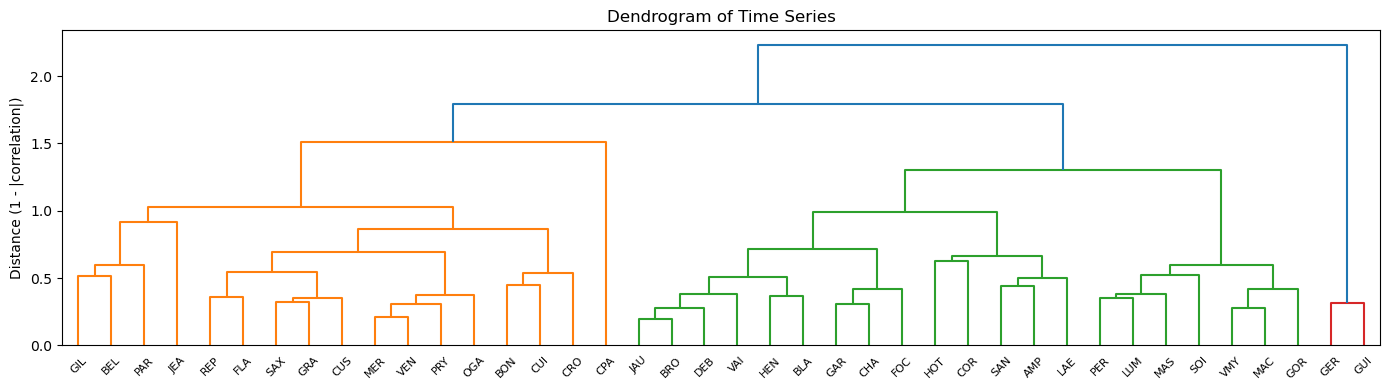

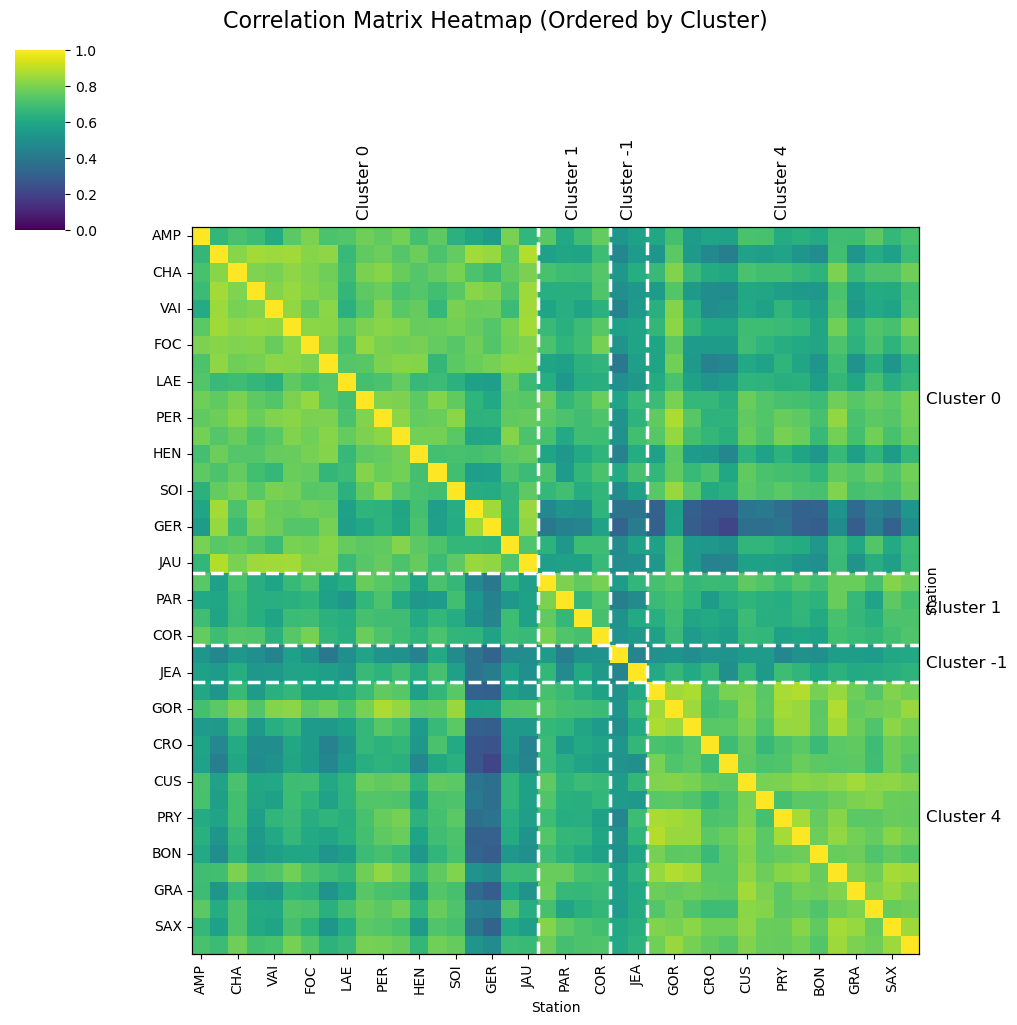

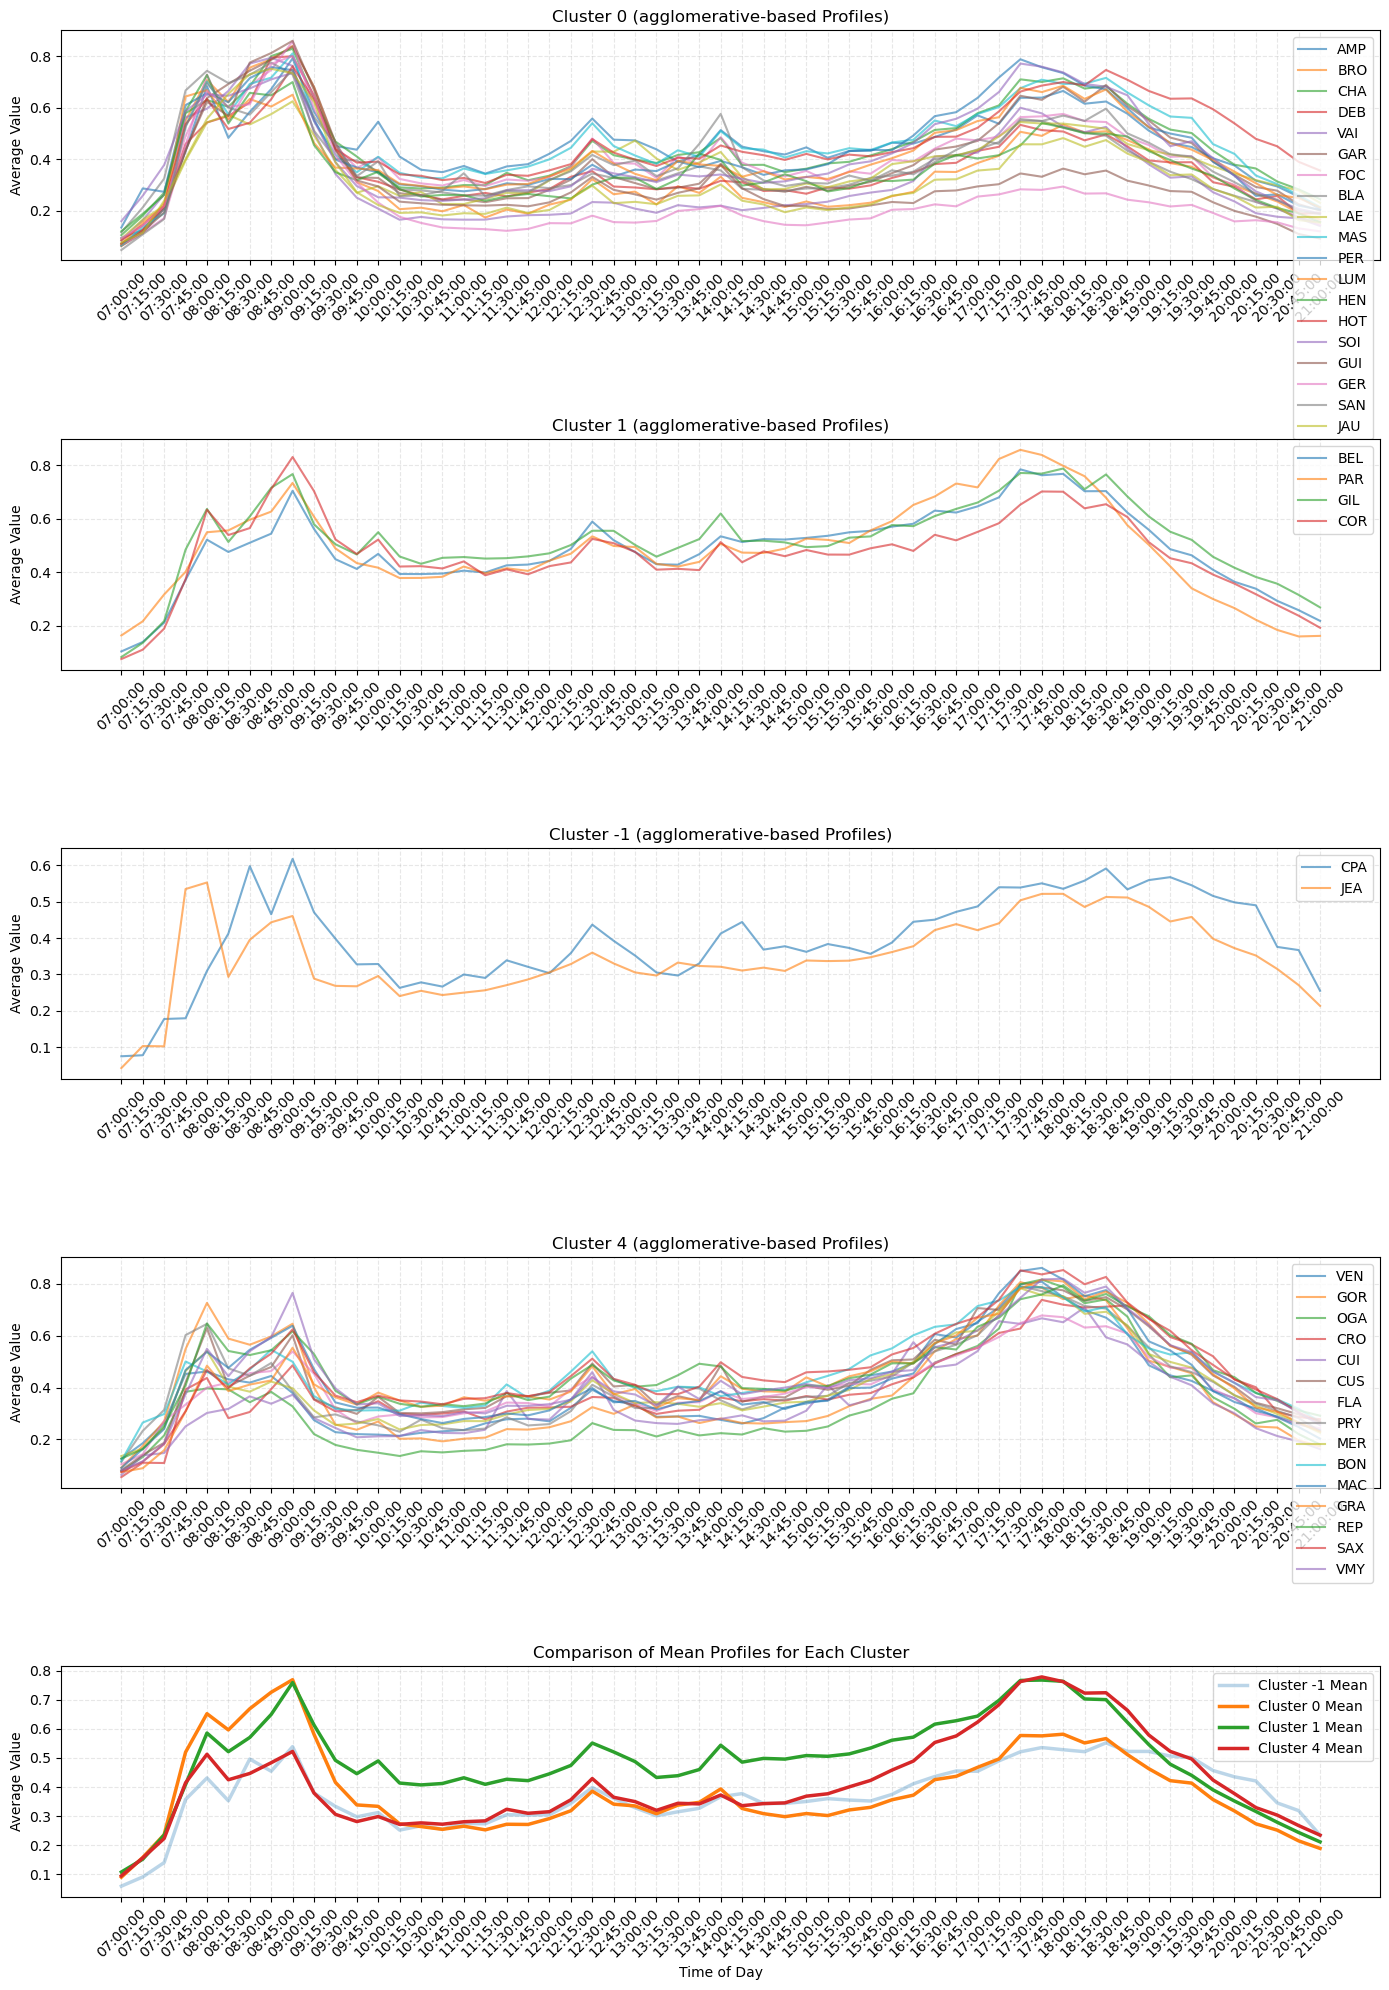

Model1 correspond to :  STAEformer_subway_out_calendar__e200_h4_bis
Model2 correspond to :  STAEformer_subway_out_subway_in_calendar_early_fusion_feature_extractor__e200_h4_bis


    Experiment: Exp1_subway_in
Exp1_subway_in
    Horizon h=1
STAEformer_subway_in_subway_out_calendar_late_fusion_adp_query_cross_attn_traffic_model_backbone_InEmb24_ctxInEmb24_adp16_adpQ24__e80_h1_bis
STAEformer_subway_in_subway_out_calendar_early_fusion_adp_query_cross_attn_traffic_model_backbone_InEmb24_ctxInEmb8_adp16_adpQ0__e80_h1_bis
STAEformer_subway_in_subway_out_calendar_late_fusion_adp_query_cross_attn_traffic_model_backbone_InEmb24_ctxInEmb24_adp16_adpQ0__e80_h1_bis
STAEformer_subway_in_subway_out_calendar_late_fusion_adp_query_cross_attn_traffic_model_backbone_InEmb24_ctxInEmb8_adp16_adpQ24__e80_h1_bis
STAEformer_subway_in_subway_out_calendar_early_fusion_independant_embedding__e80_h1_bis
STAEformer_subway_in_subway_out_calendar_early_fusion_shared_embedding__e80_h1_bis
STAEformer_subway_in_subway

/home/rrochas/prediction-validation/pipeline/clustering/clustering.py:322: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(self.dist_matrix.values, method=self.model.linkage)


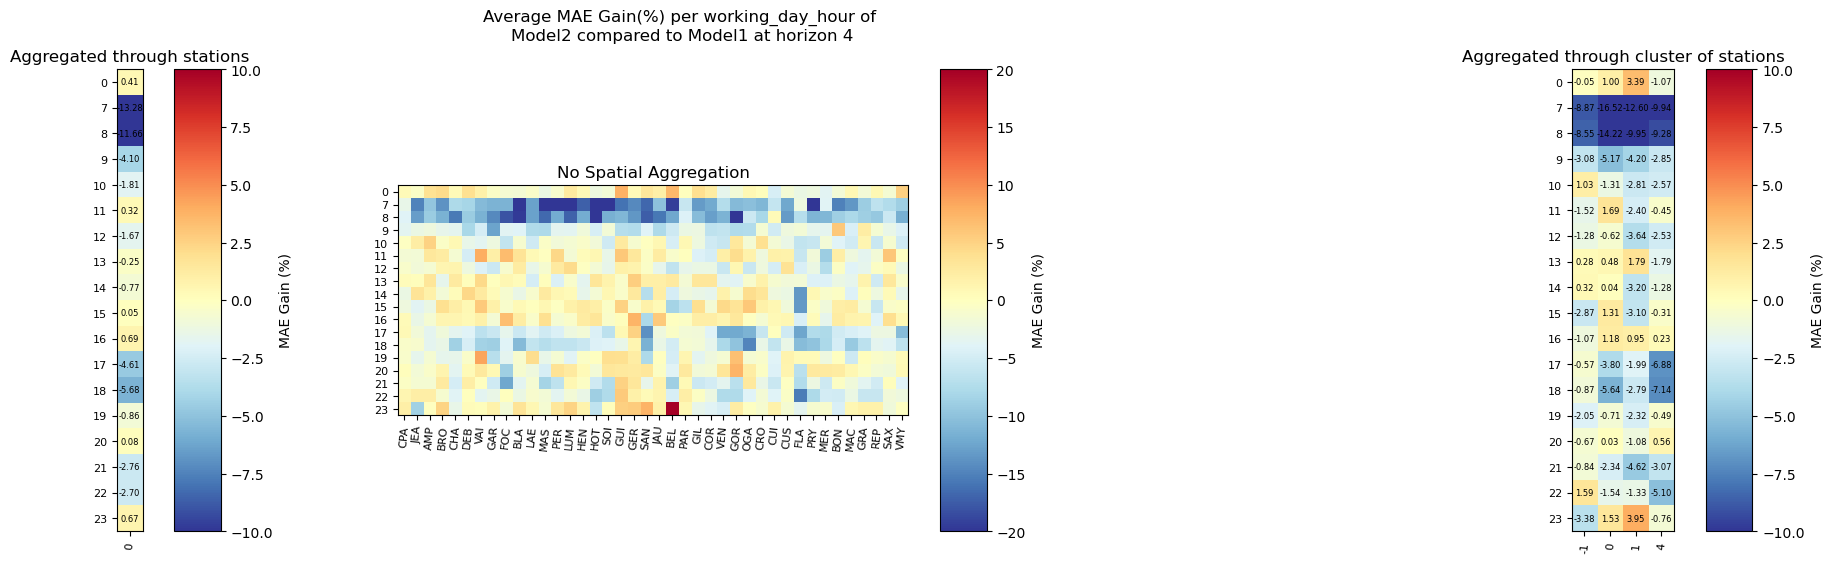

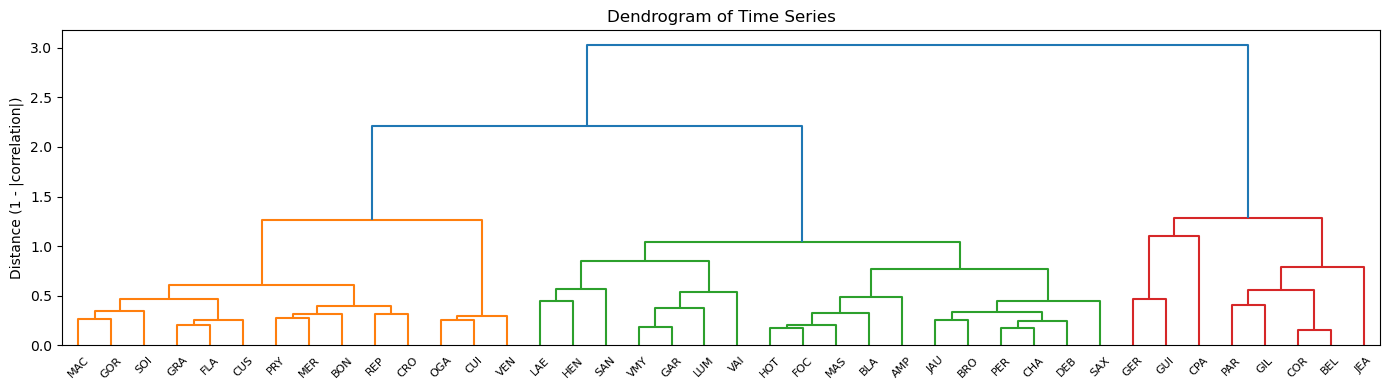

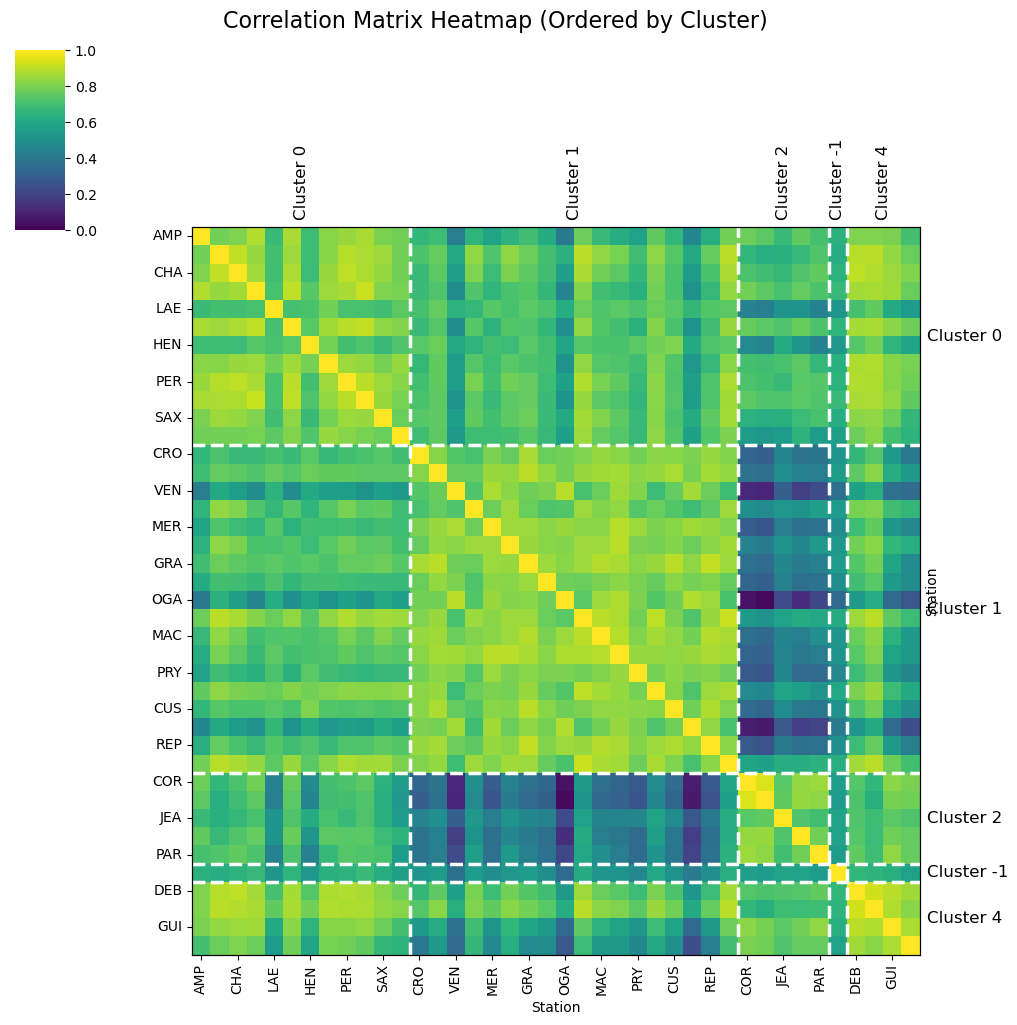

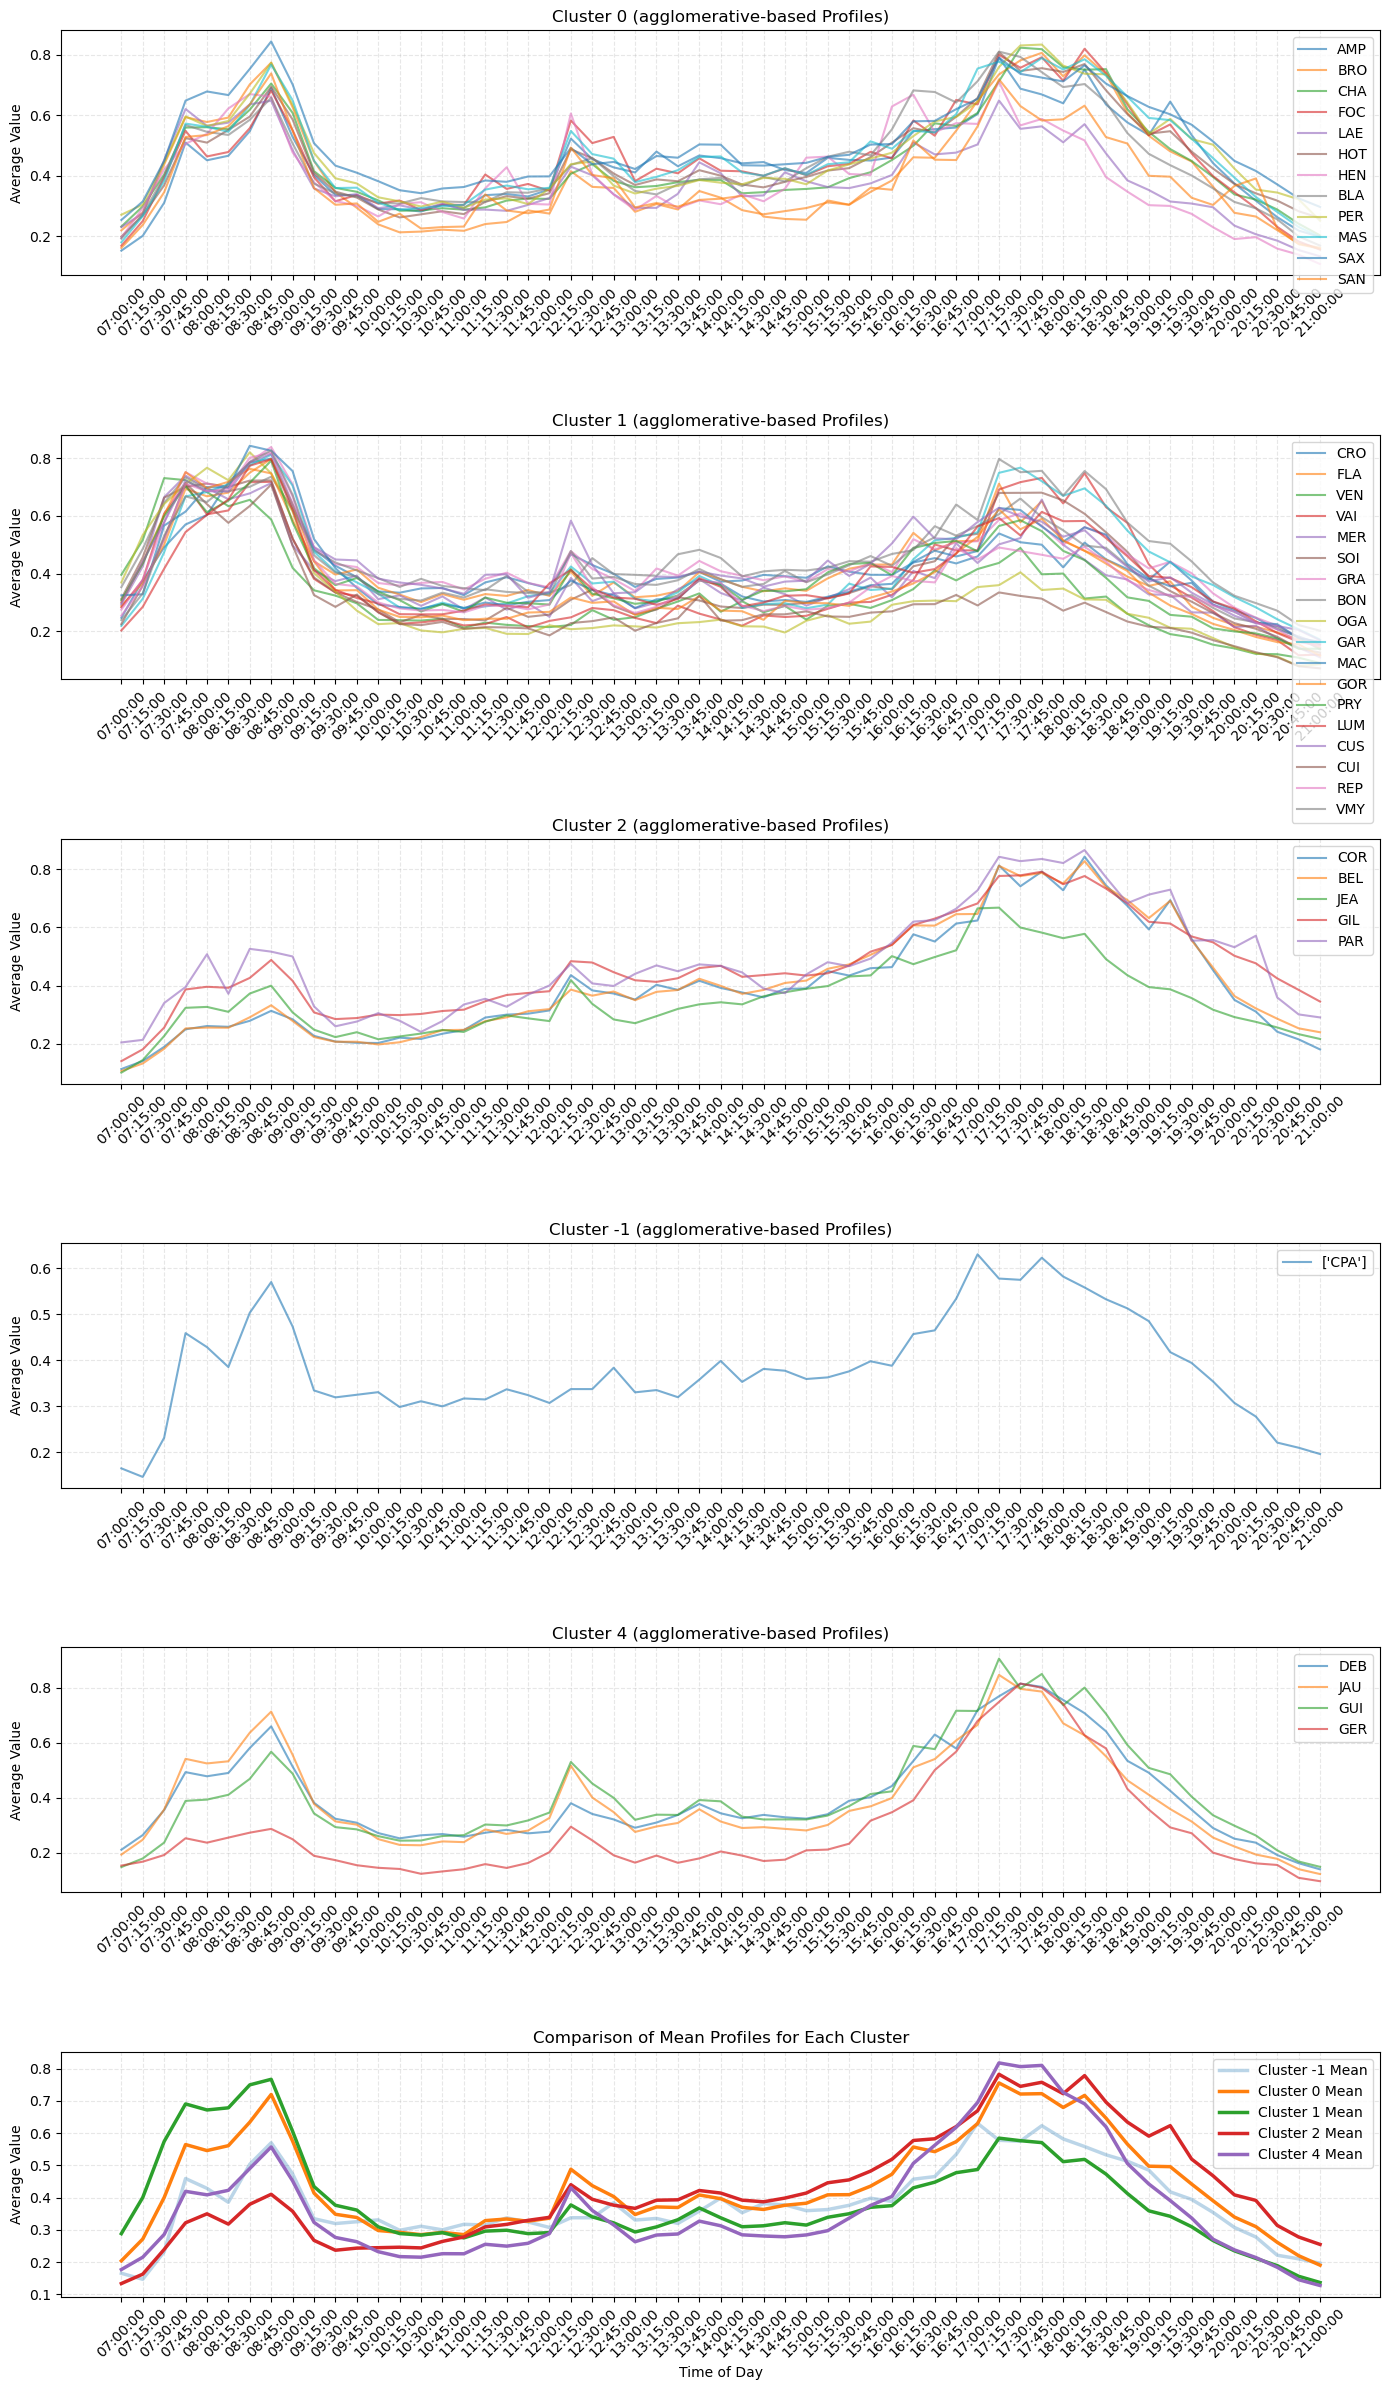

Model1 correspond to :  STAEformer_subway_in_calendar__e80_h1_bis
Model2 correspond to :  STAEformer_subway_in_subway_out_calendar_late_fusion_adp_query_cross_attn_traffic_model_backbone_InEmb24_ctxInEmb24_adp16_adpQ24__e80_h1_bis

    Horizon h=4
STAEformer_subway_in_subway_out_calendar_early_fusion_adp_query_cross_attn_traffic_model_backbone_InEmb24_ctxInEmb24_adp16_adpQ24__e80_h4_bis
STAEformer_subway_in_subway_out_calendar_early_fusion_independant_embedding__e80_h4_bis
STAEformer_subway_in_subway_out_calendar_late_fusion_adp_query_cross_attn_traffic_model_backbone_InEmb24_ctxInEmb24_adp16_adpQ24__e80_h4_bis
STAEformer_subway_in_subway_out_calendar_early_fusion_traffic_model_backbone_InEmb24_adp16__e80_h4_bis
STAEformer_subway_in_subway_out_calendar_late_fusion_traffic_model_backbone_InEmb24_adp16__e80_h4_bis
STAEformer_subway_in_subway_out_calendar_early_fusion_adp_query_cross_attn_traffic_model_backbone_InEmb24_ctxInEmb8_adp16_adpQ24__e80_h4_bis
STAEformer_subway_in_subway_out_cal

/home/rrochas/prediction-validation/pipeline/clustering/clustering.py:322: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(self.dist_matrix.values, method=self.model.linkage)


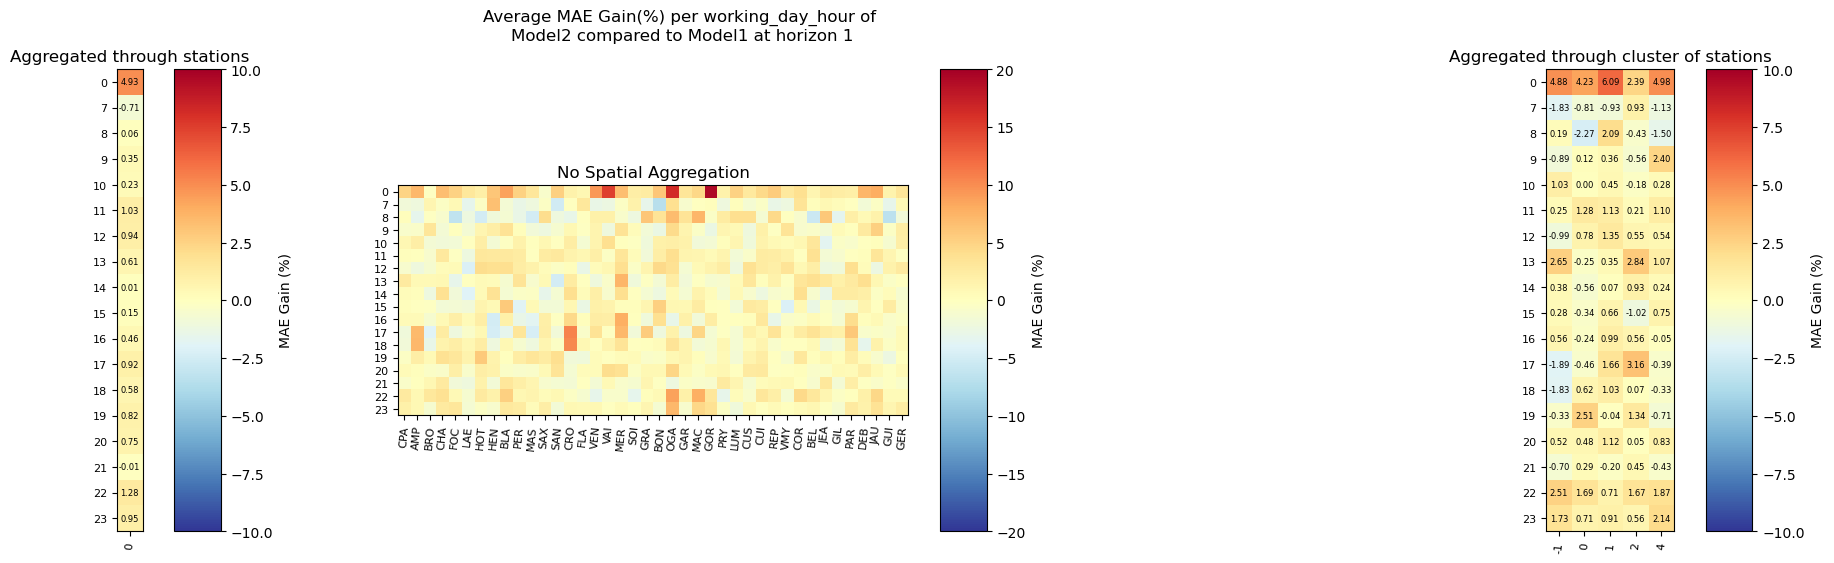

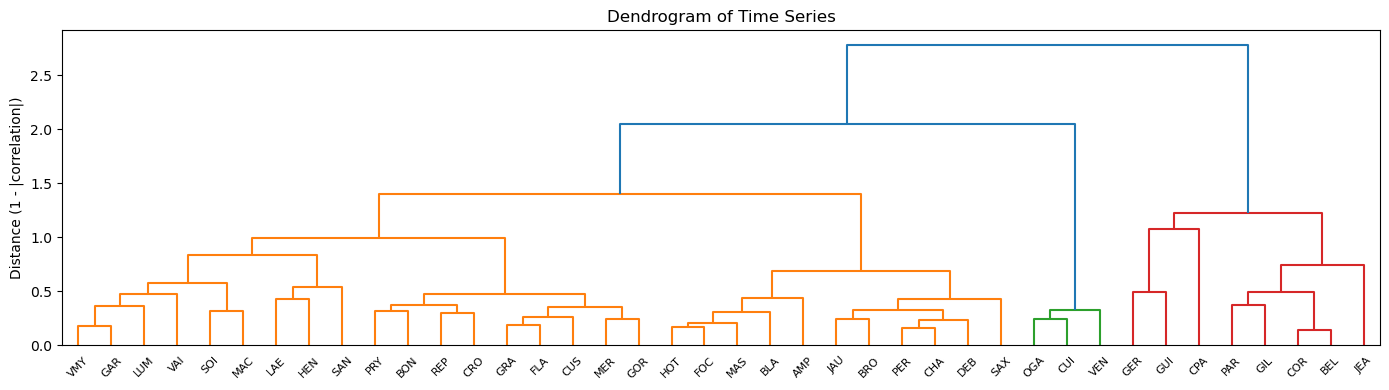

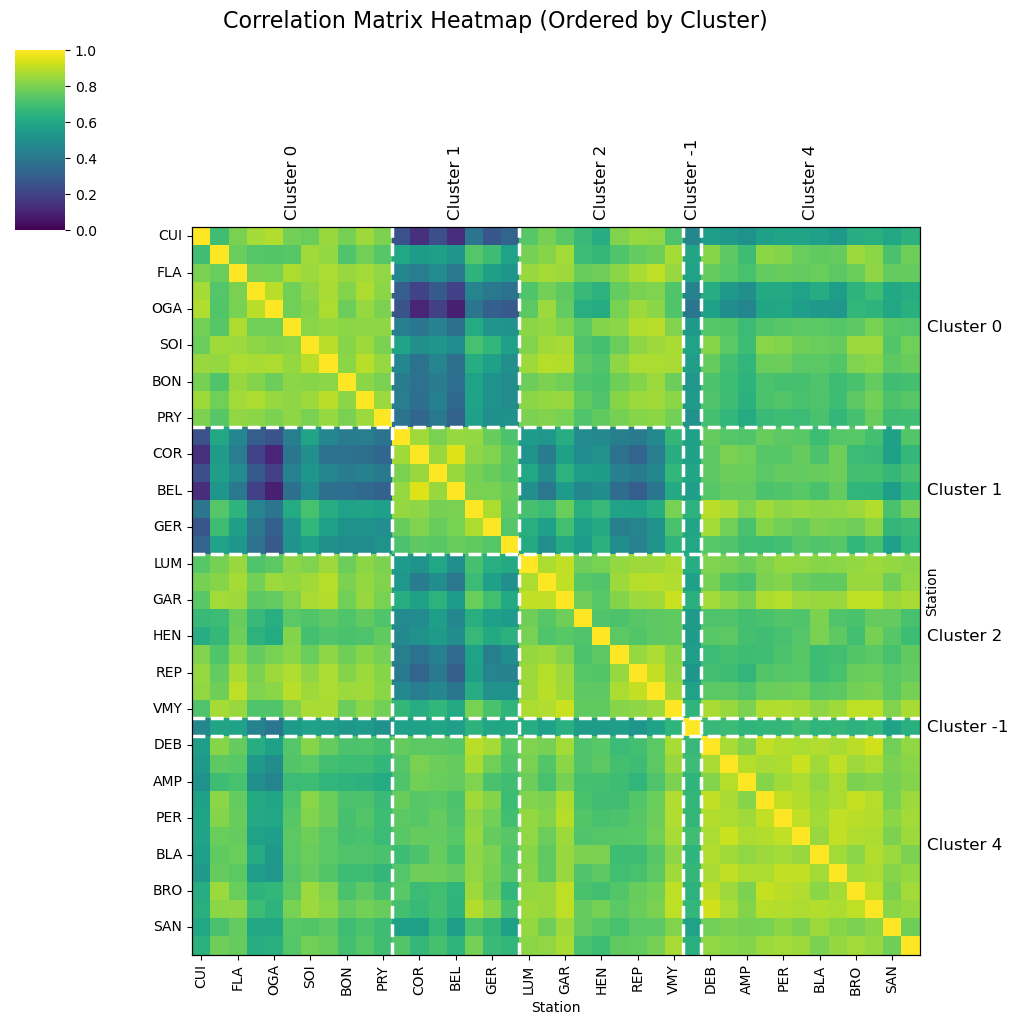

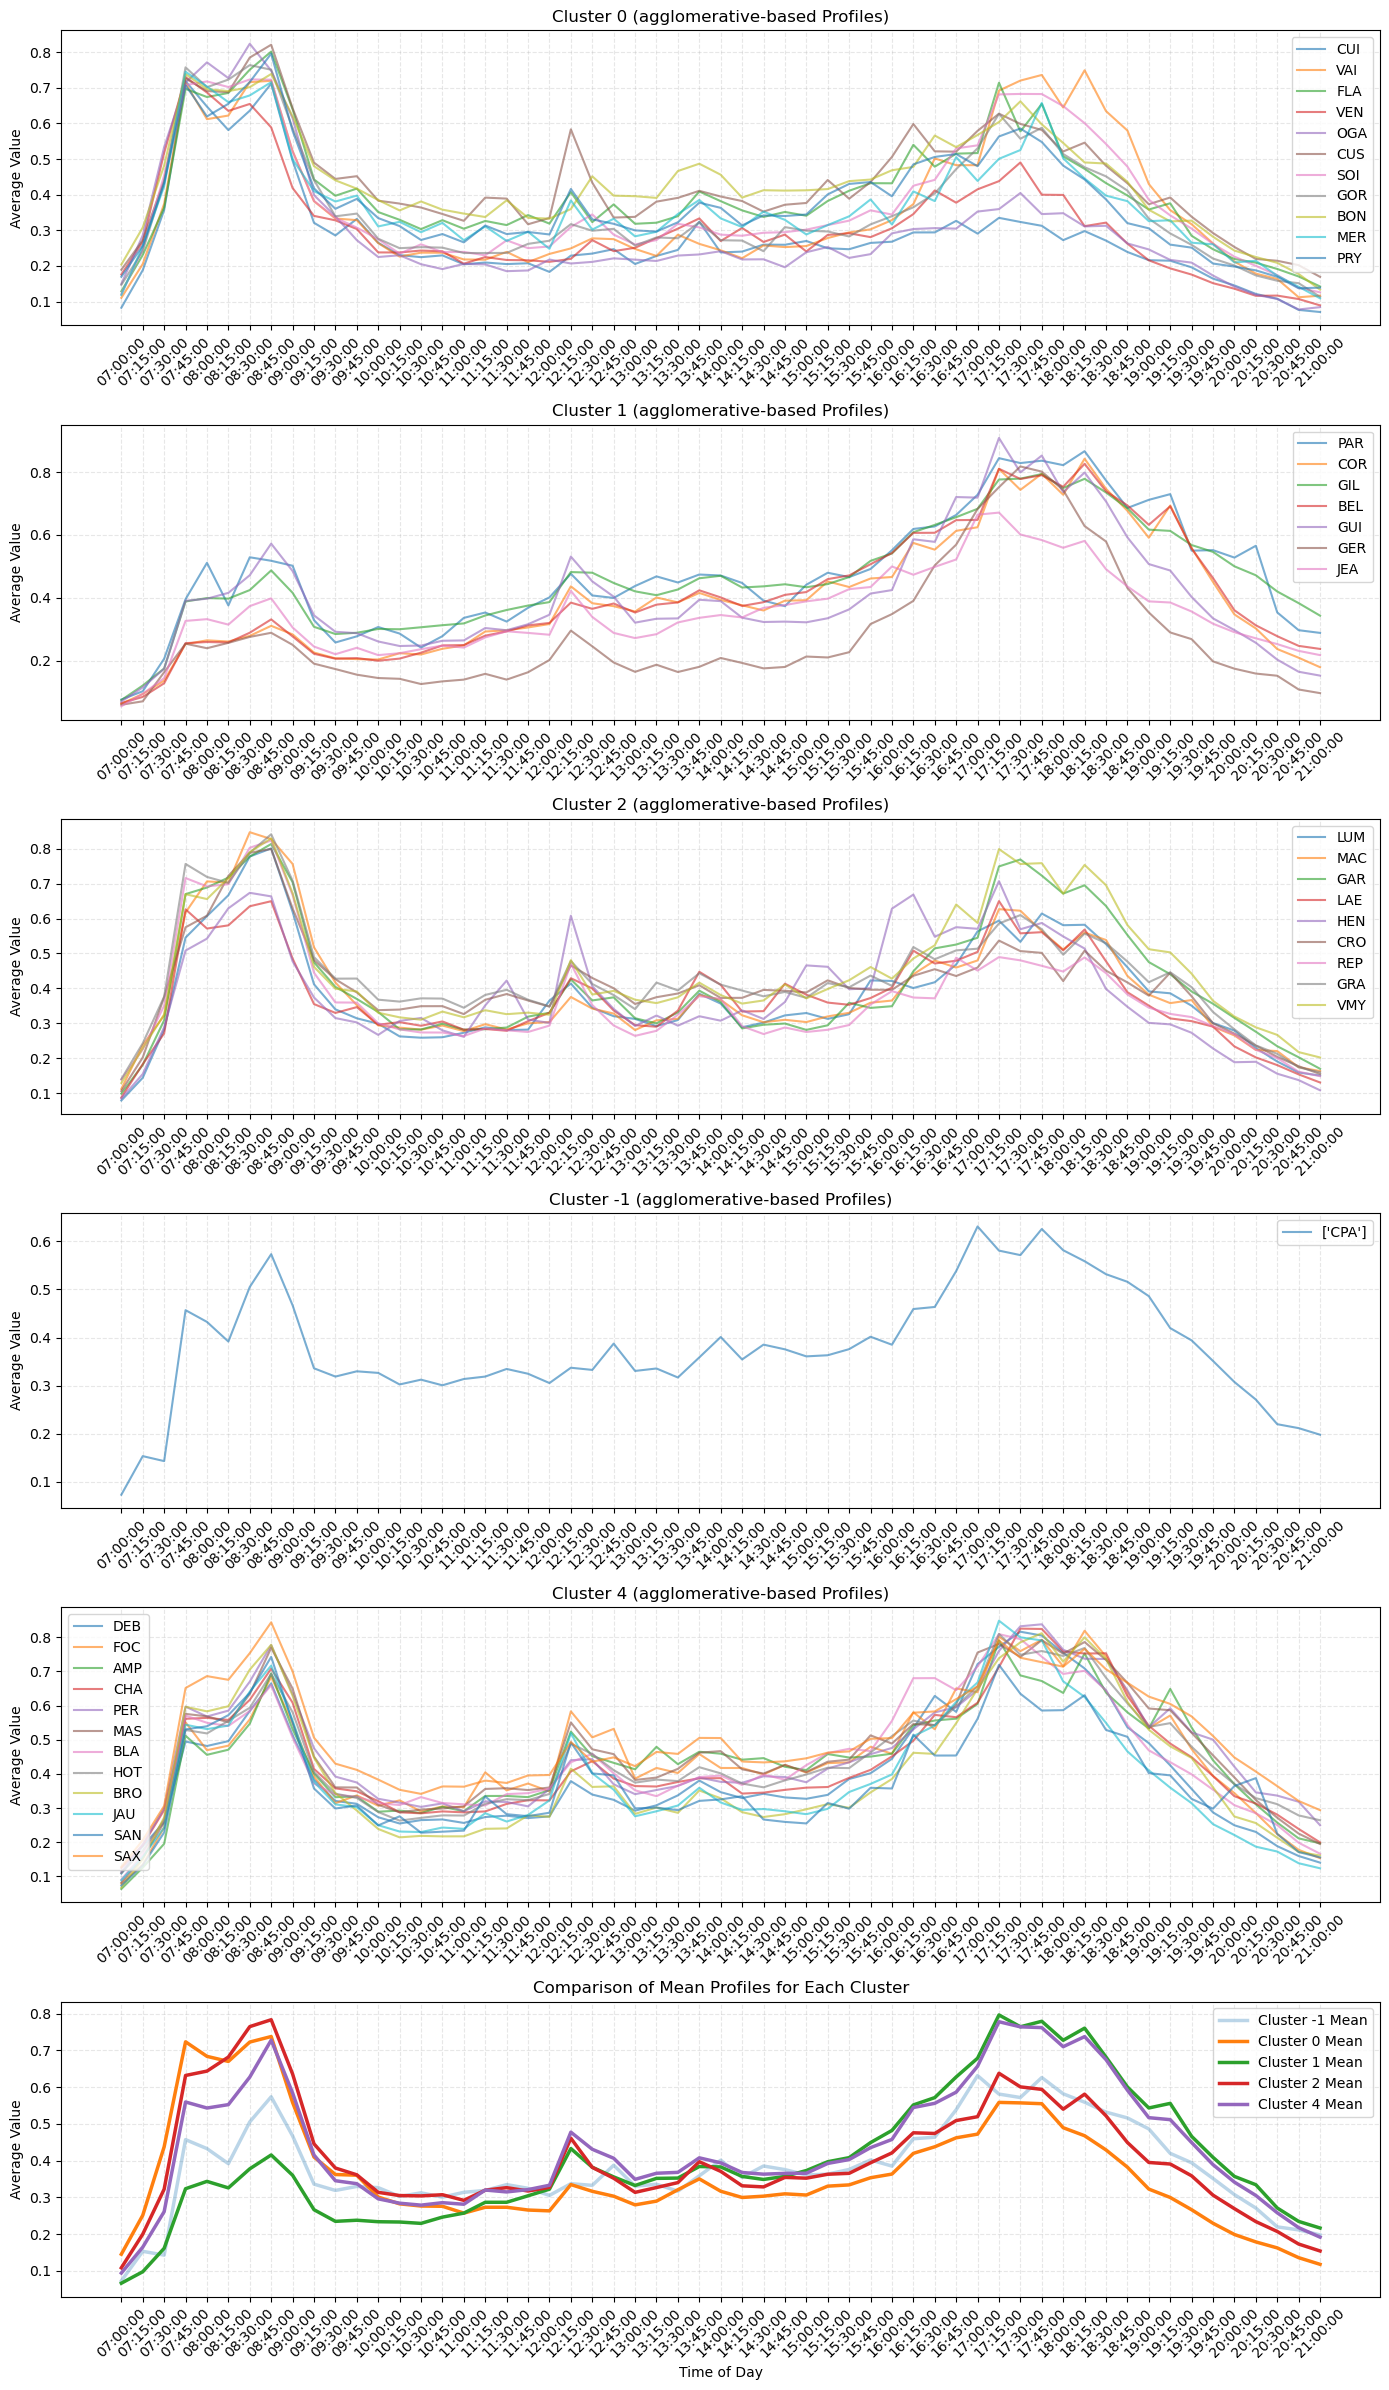

Model1 correspond to :  STAEformer_subway_in_calendar__e80_h4_bis
Model2 correspond to :  STAEformer_subway_in_subway_out_calendar_early_fusion_adp_query_cross_attn_traffic_model_backbone_InEmb24_ctxInEmb24_adp16_adpQ24__e80_h4_bis


    Experiment: Exp1_subway_out
Exp1_subway_out
    Horizon h=1
STAEformer_subway_out_subway_in_calendar_late_fusion_simple_embedding__e80_h1_bis
STAEformer_subway_out_subway_in_calendar_early_fusion_independant_embedding__e80_h1_bis
STAEformer_subway_out_subway_in_calendar_early_fusion_s_proj_t_proj__e80_h1_bis
STAEformer_subway_out_subway_in_calendar_early_fusion_adp_query_cross_attn_traffic_model_backbone_InEmb24_ctxInEmb24_adp16_adpQ24__e80_h1_bis
STAEformer_subway_out_subway_in_calendar_late_fusion_adp_query_cross_attn_traffic_model_backbone_InEmb24_ctxInEmb24_adp16_adpQ24__e80_h1_bis
STAEformer_subway_out_subway_in_calendar_early_fusion_adp_query_cross_attn_traffic_model_backbone_InEmb24_ctxInEmb8_adp16_adpQ24__e80_h1_bis
STAEformer_subway_out_subway

/home/rrochas/prediction-validation/pipeline/clustering/clustering.py:322: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(self.dist_matrix.values, method=self.model.linkage)


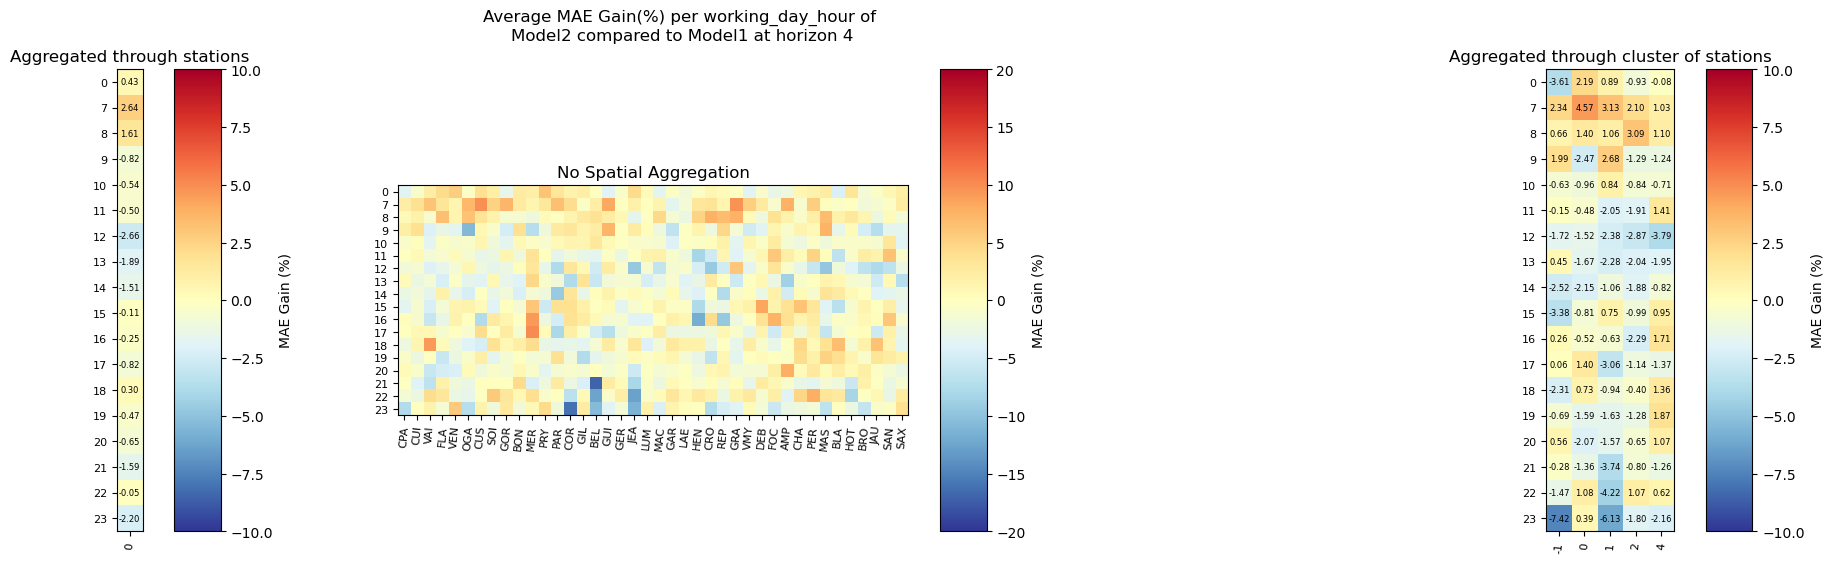

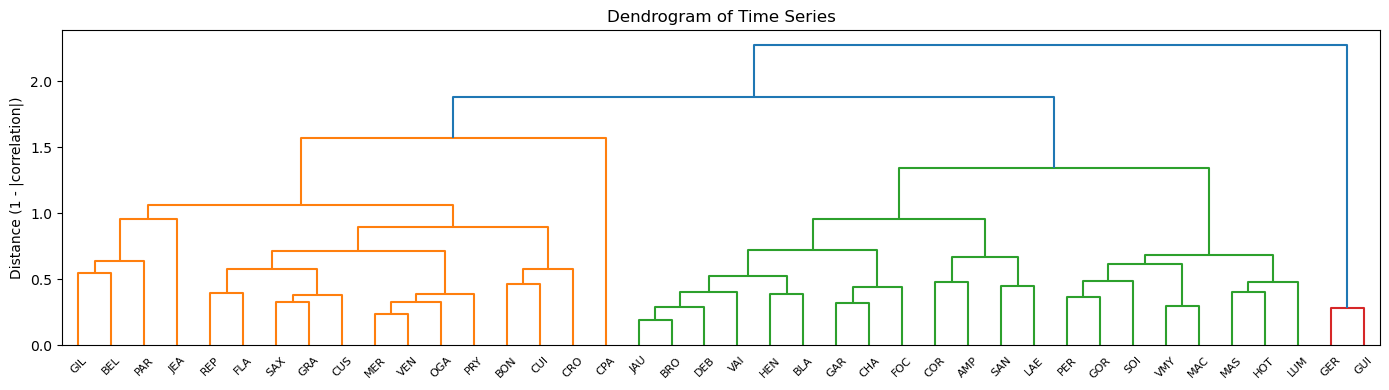

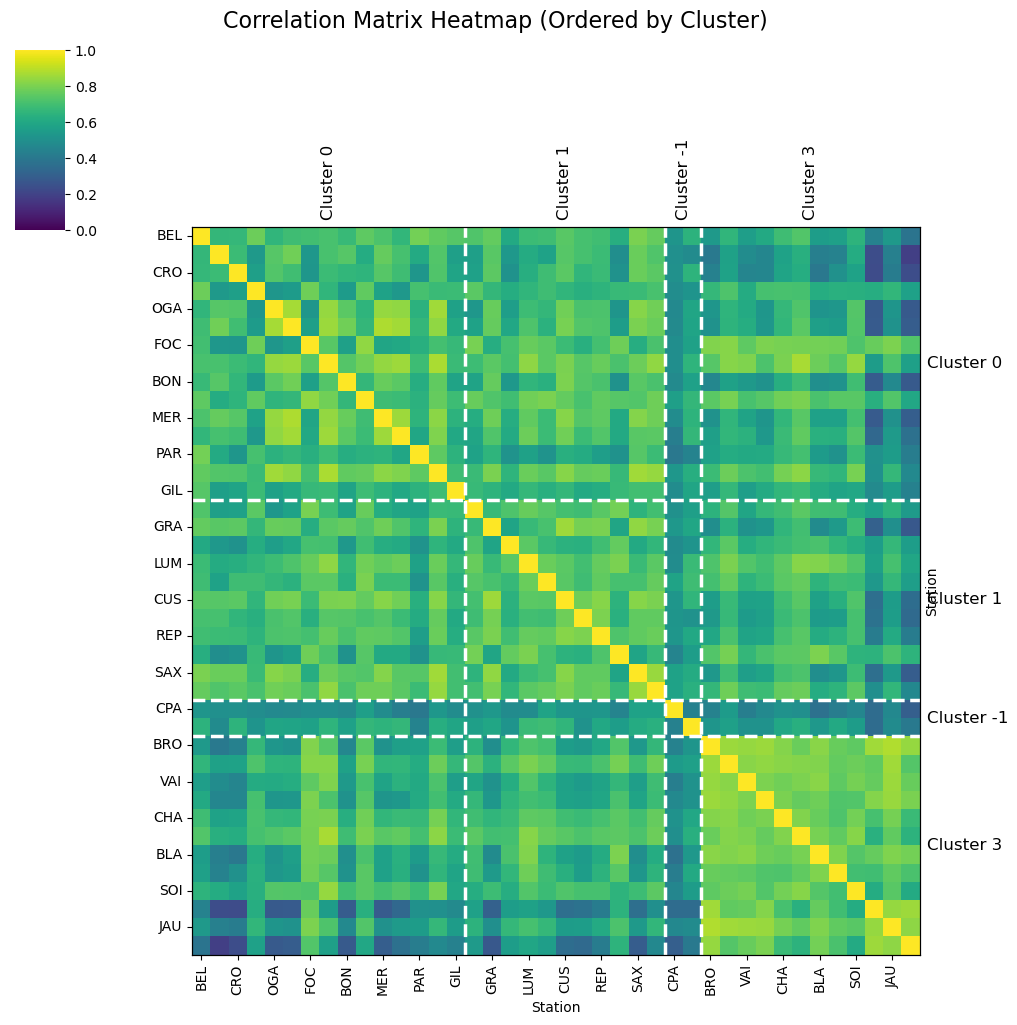

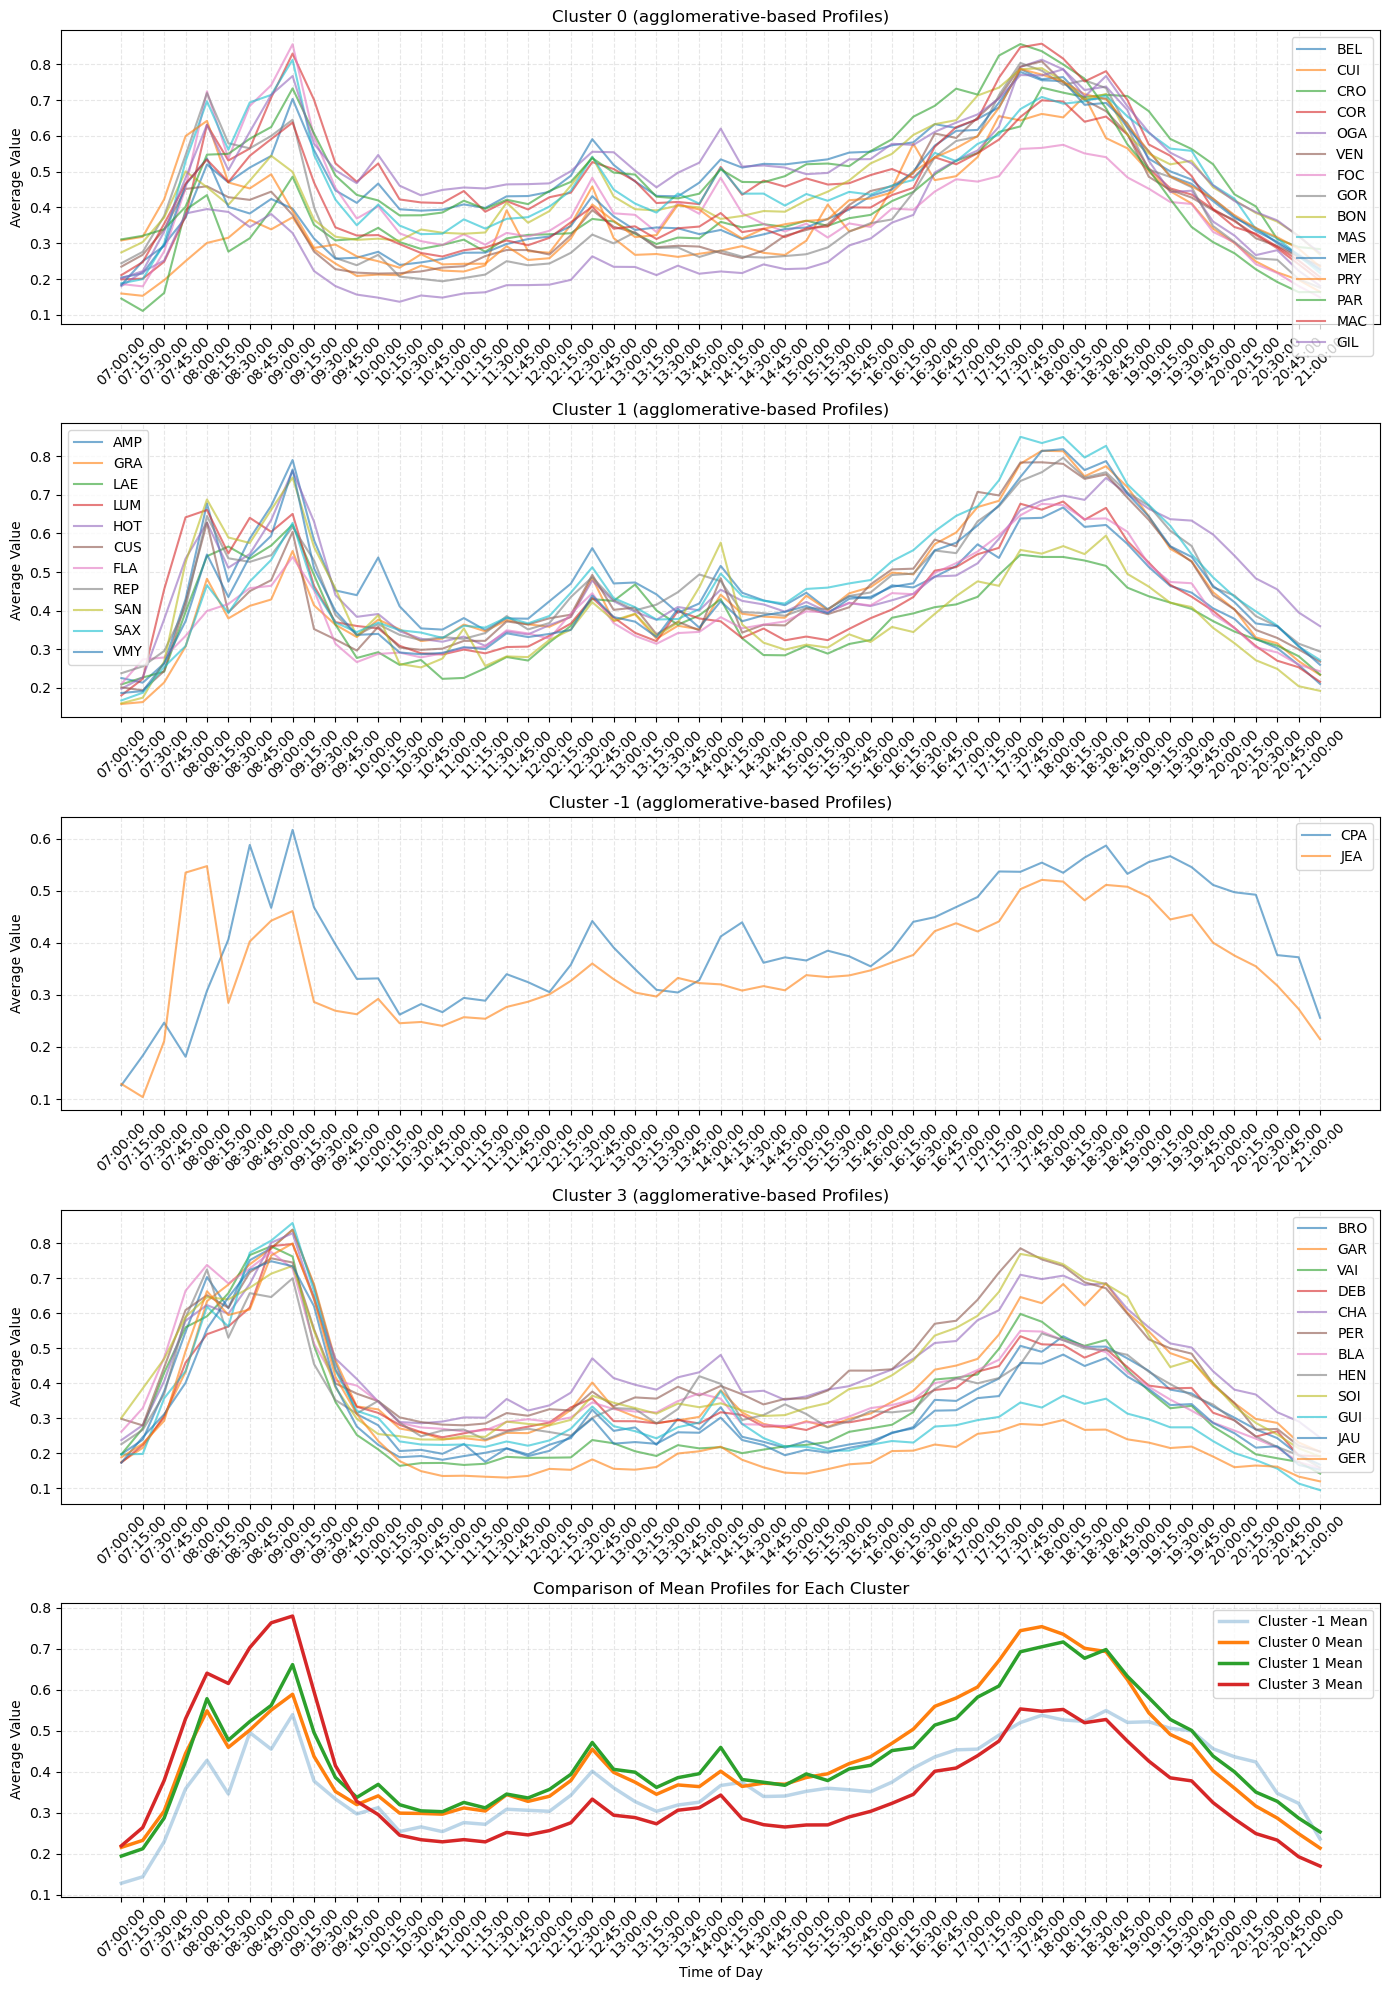

Model1 correspond to :  STAEformer_subway_out_calendar__e80_h1_bis
Model2 correspond to :  STAEformer_subway_out_subway_in_calendar_late_fusion_simple_embedding__e80_h1_bis

    Horizon h=4
STAEformer_subway_out_subway_in_calendar_late_fusion_adp_query_cross_attn_traffic_model_backbone_InEmb24_ctxInEmb8_adp16_adpQ24__e80_h4_bis
STAEformer_subway_out_subway_in_calendar_early_fusion_adp_query_cross_attn_traffic_model_backbone_InEmb24_ctxInEmb8_adp16_adpQ0__e80_h4_bis
STAEformer_subway_out_subway_in_calendar_early_fusion_shared_embedding__e80_h4_bis
STAEformer_subway_out_subway_in_calendar_late_fusion_adp_query_cross_attn_traffic_model_backbone_InEmb24_ctxInEmb24_adp16_adpQ0__e80_h4_bis
STAEformer_subway_out_subway_in_calendar_early_fusion_s_proj_t_proj__e80_h4_bis
STAEformer_subway_out_subway_in_calendar_early_fusion_independant_embedding__e80_h4_bis
STAEformer_subway_out_subway_in_calendar_late_fusion_traffic_model_backbone_InEmb24_adp16__e80_h4_bis
STAEformer_subway_out_subway_in_calen

/home/rrochas/prediction-validation/pipeline/clustering/clustering.py:322: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(self.dist_matrix.values, method=self.model.linkage)


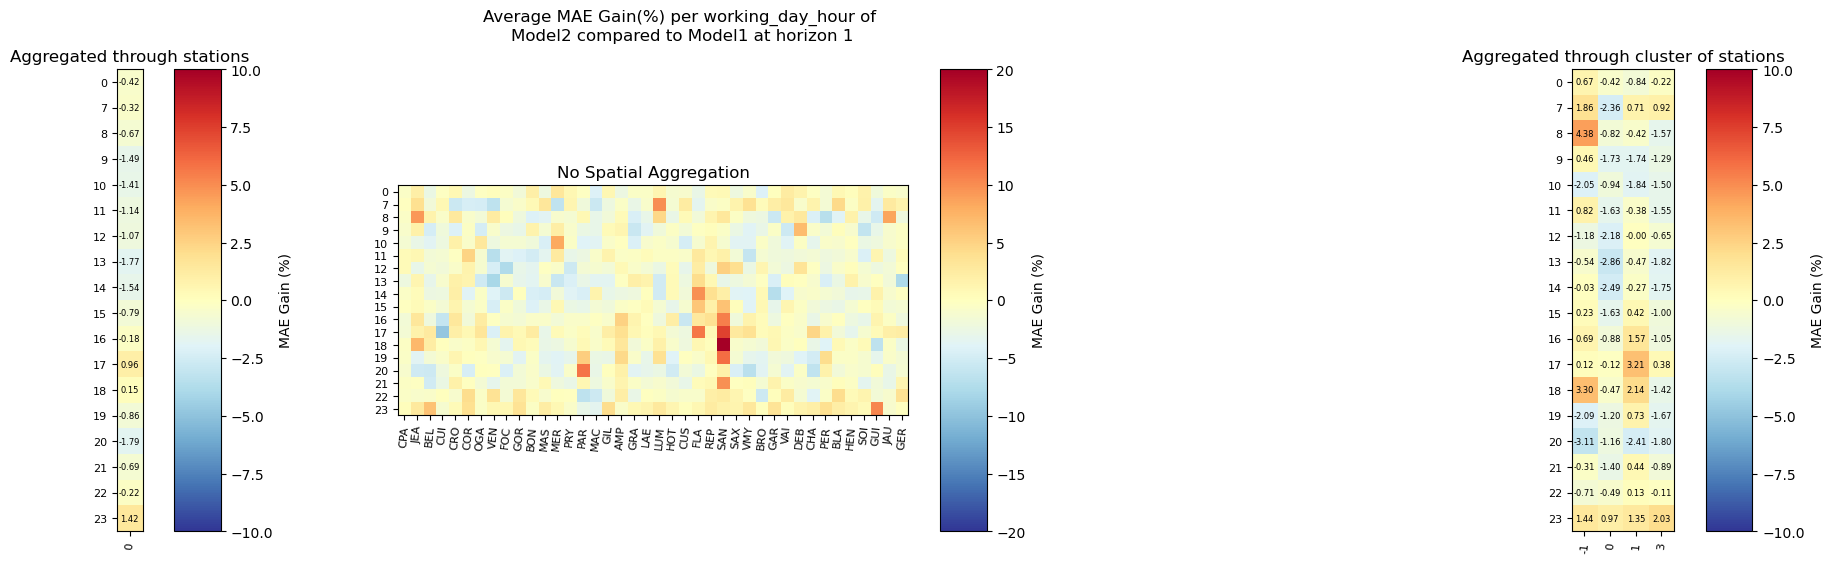

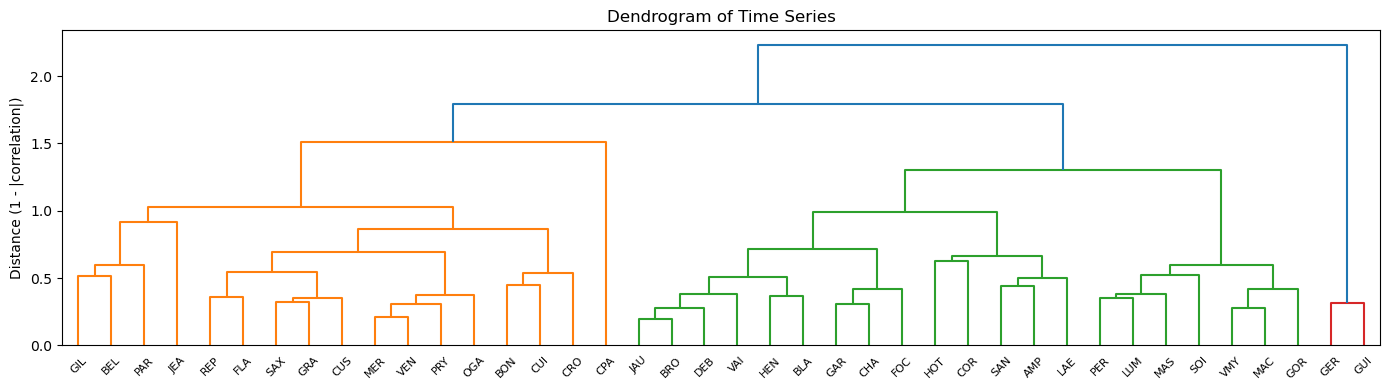

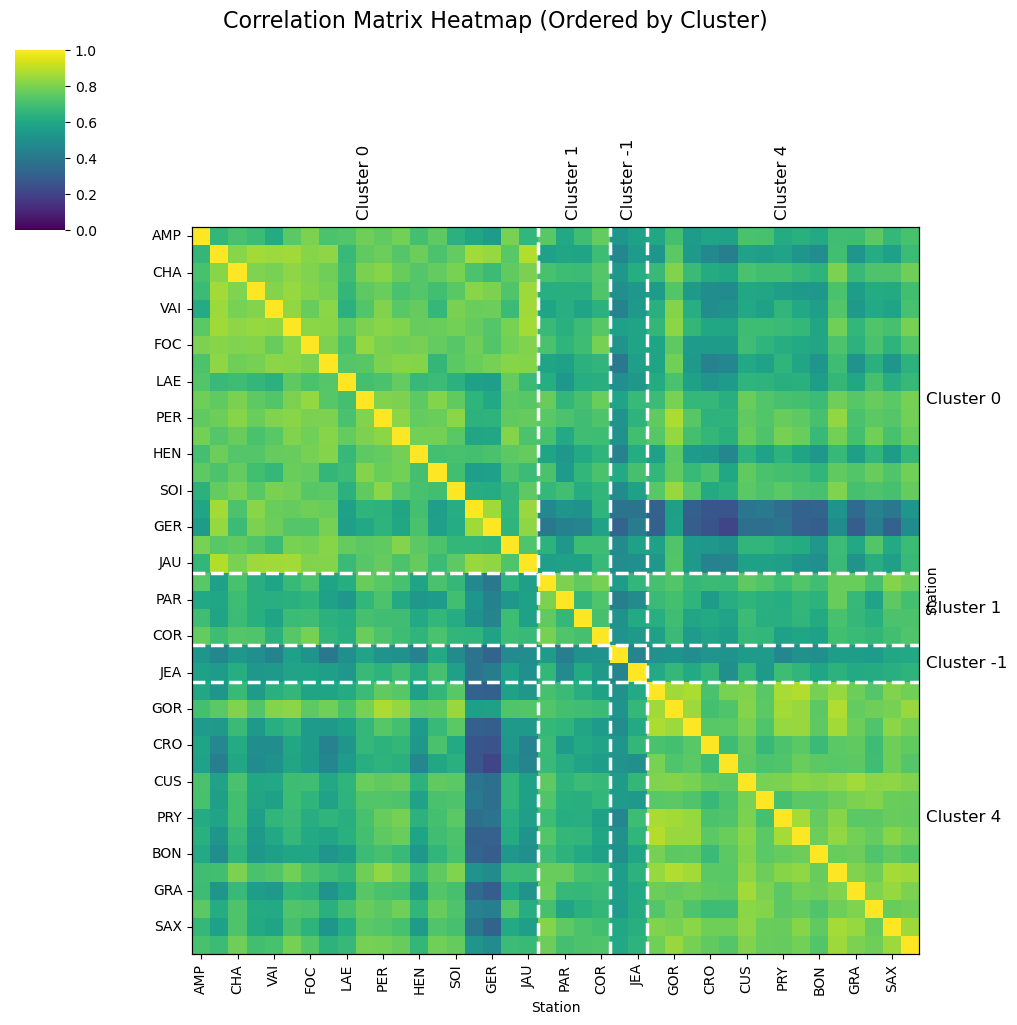

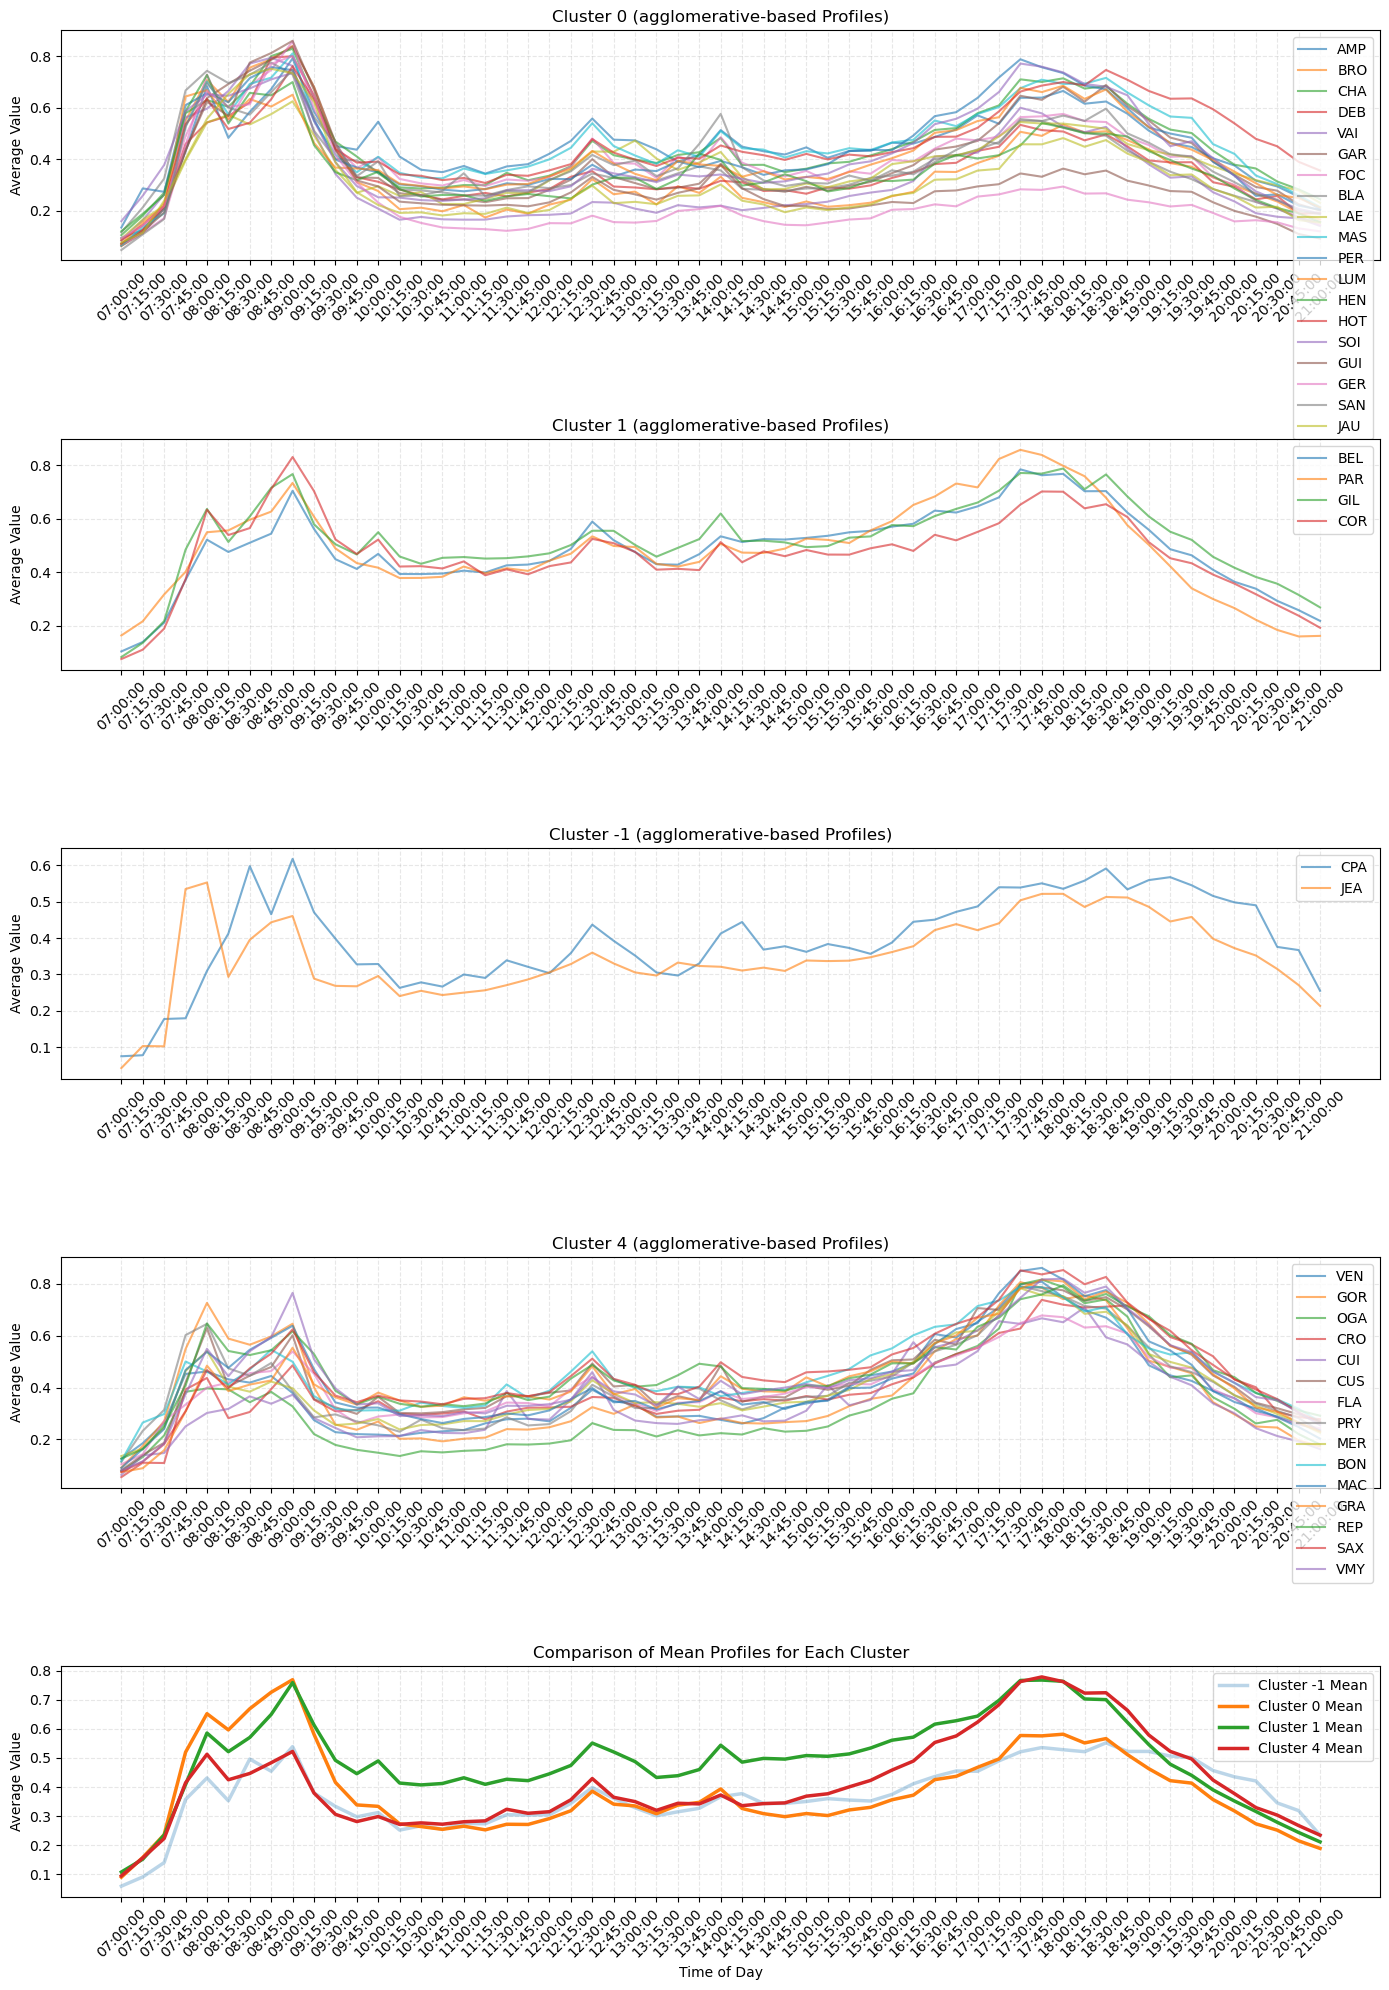

Model1 correspond to :  STAEformer_subway_out_calendar__e80_h4_bis
Model2 correspond to :  STAEformer_subway_out_subway_in_calendar_late_fusion_adp_query_cross_attn_traffic_model_backbone_InEmb24_ctxInEmb8_adp16_adpQ24__e80_h4_bis


    Experiment: Exp2
Exp2
    Horizon h=4
STAEformer_bike_out_weather_calendar_late_fusion_feature_extractor__e200_h4_bis
STAEformer_bike_out_weather_calendar_late_fusion_s_proj_t_proj__e200_h4_bis
STAEformer_bike_out_weather_calendar_late_fusion_repeat_t_proj__e200_h4_bis
STAEformer_bike_out_weather_calendar_early_fusion_repeat_t_proj__e200_h4_bis
STAEformer_bike_out_weather_calendar_early_fusion_s_proj_t_proj__e200_h4_bis
STAEformer_bike_out_weather_calendar_early_fusion_feature_extractor__e200_h4_bis
    trial_id1 STAEformer_bike_out_calendar__e200_h4_bis
    trial_id2 STAEformer_bike_out_weather_calendar_late_fusion_feature_extractor__e200_h4_bis
Trial ID 1:  _STAEformer_bike_out_calendar__e200_h4_bis1_f5
Trial ID 2:  _STAEformer_bike_out_weather_calend

/home/rrochas/prediction-validation/pipeline/clustering/clustering.py:322: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(self.dist_matrix.values, method=self.model.linkage)


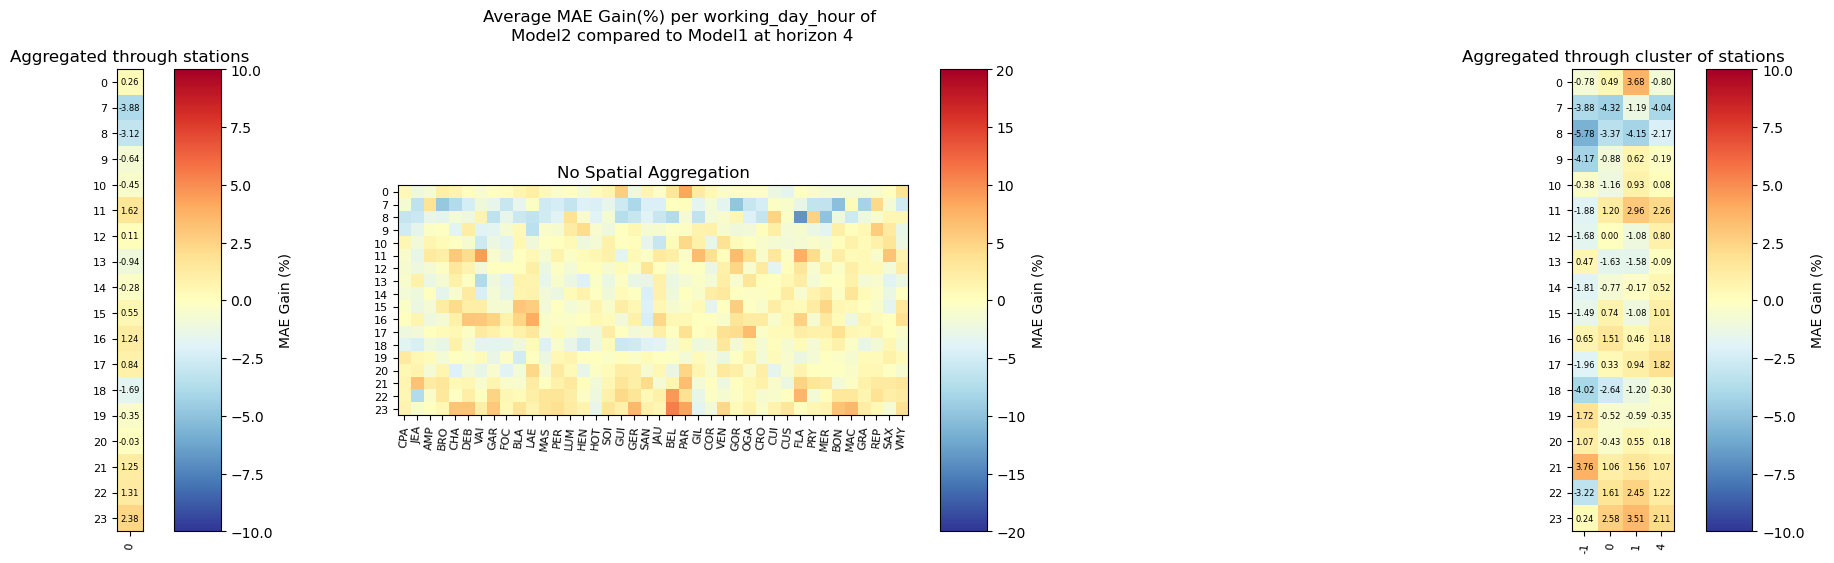

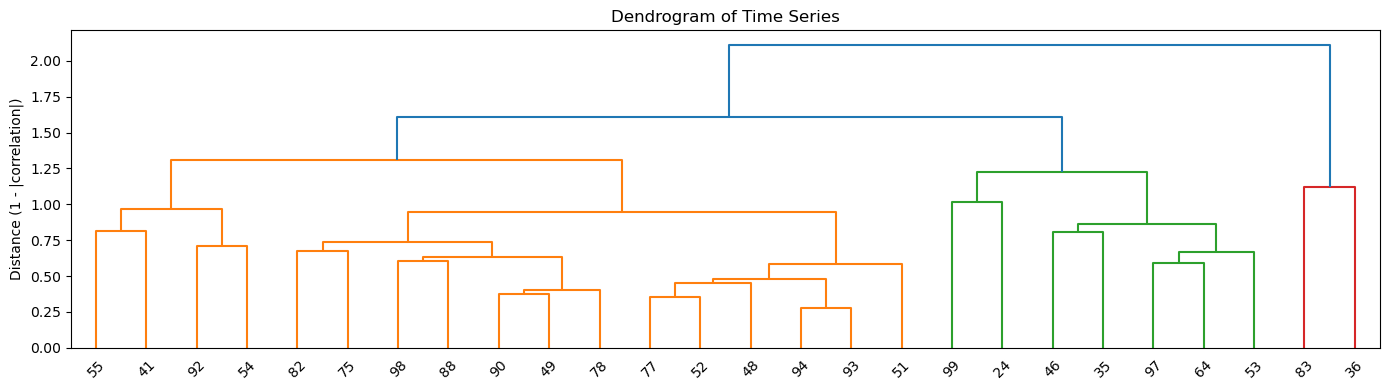

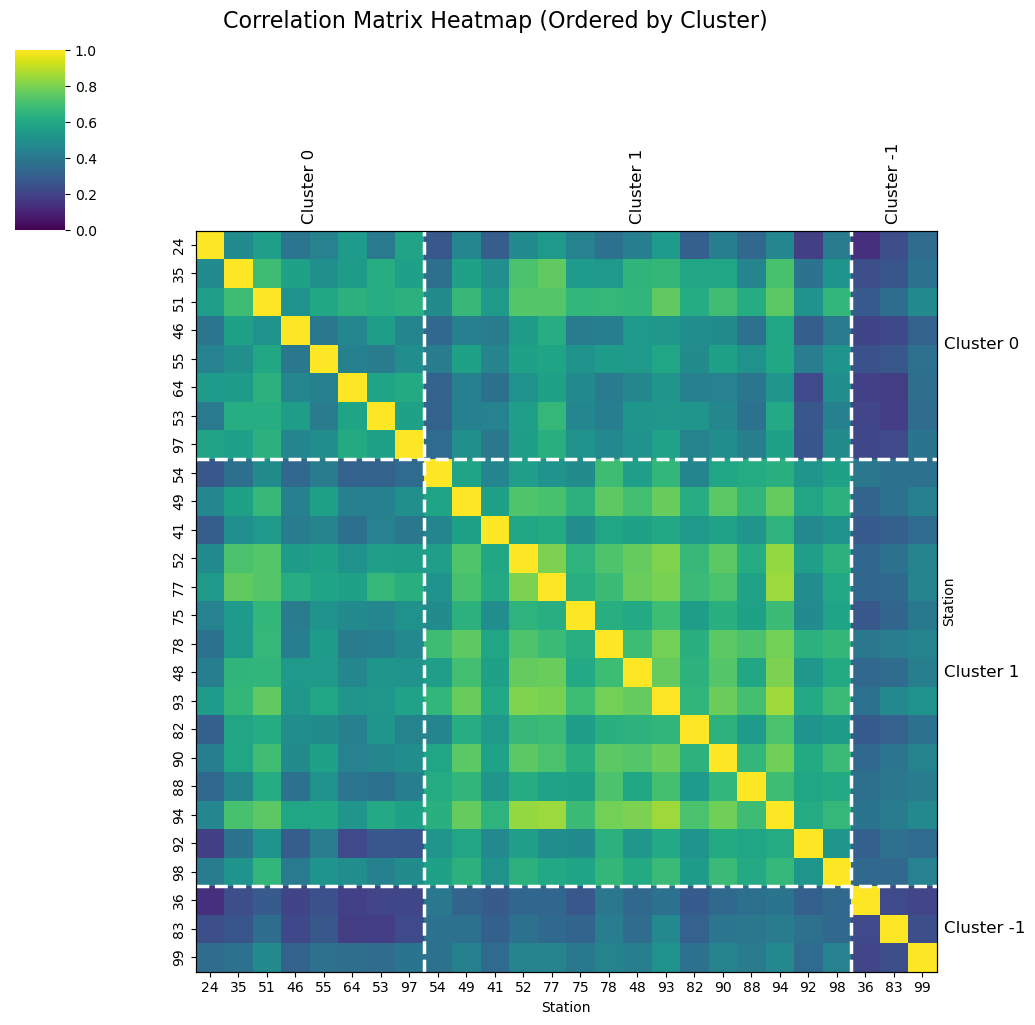

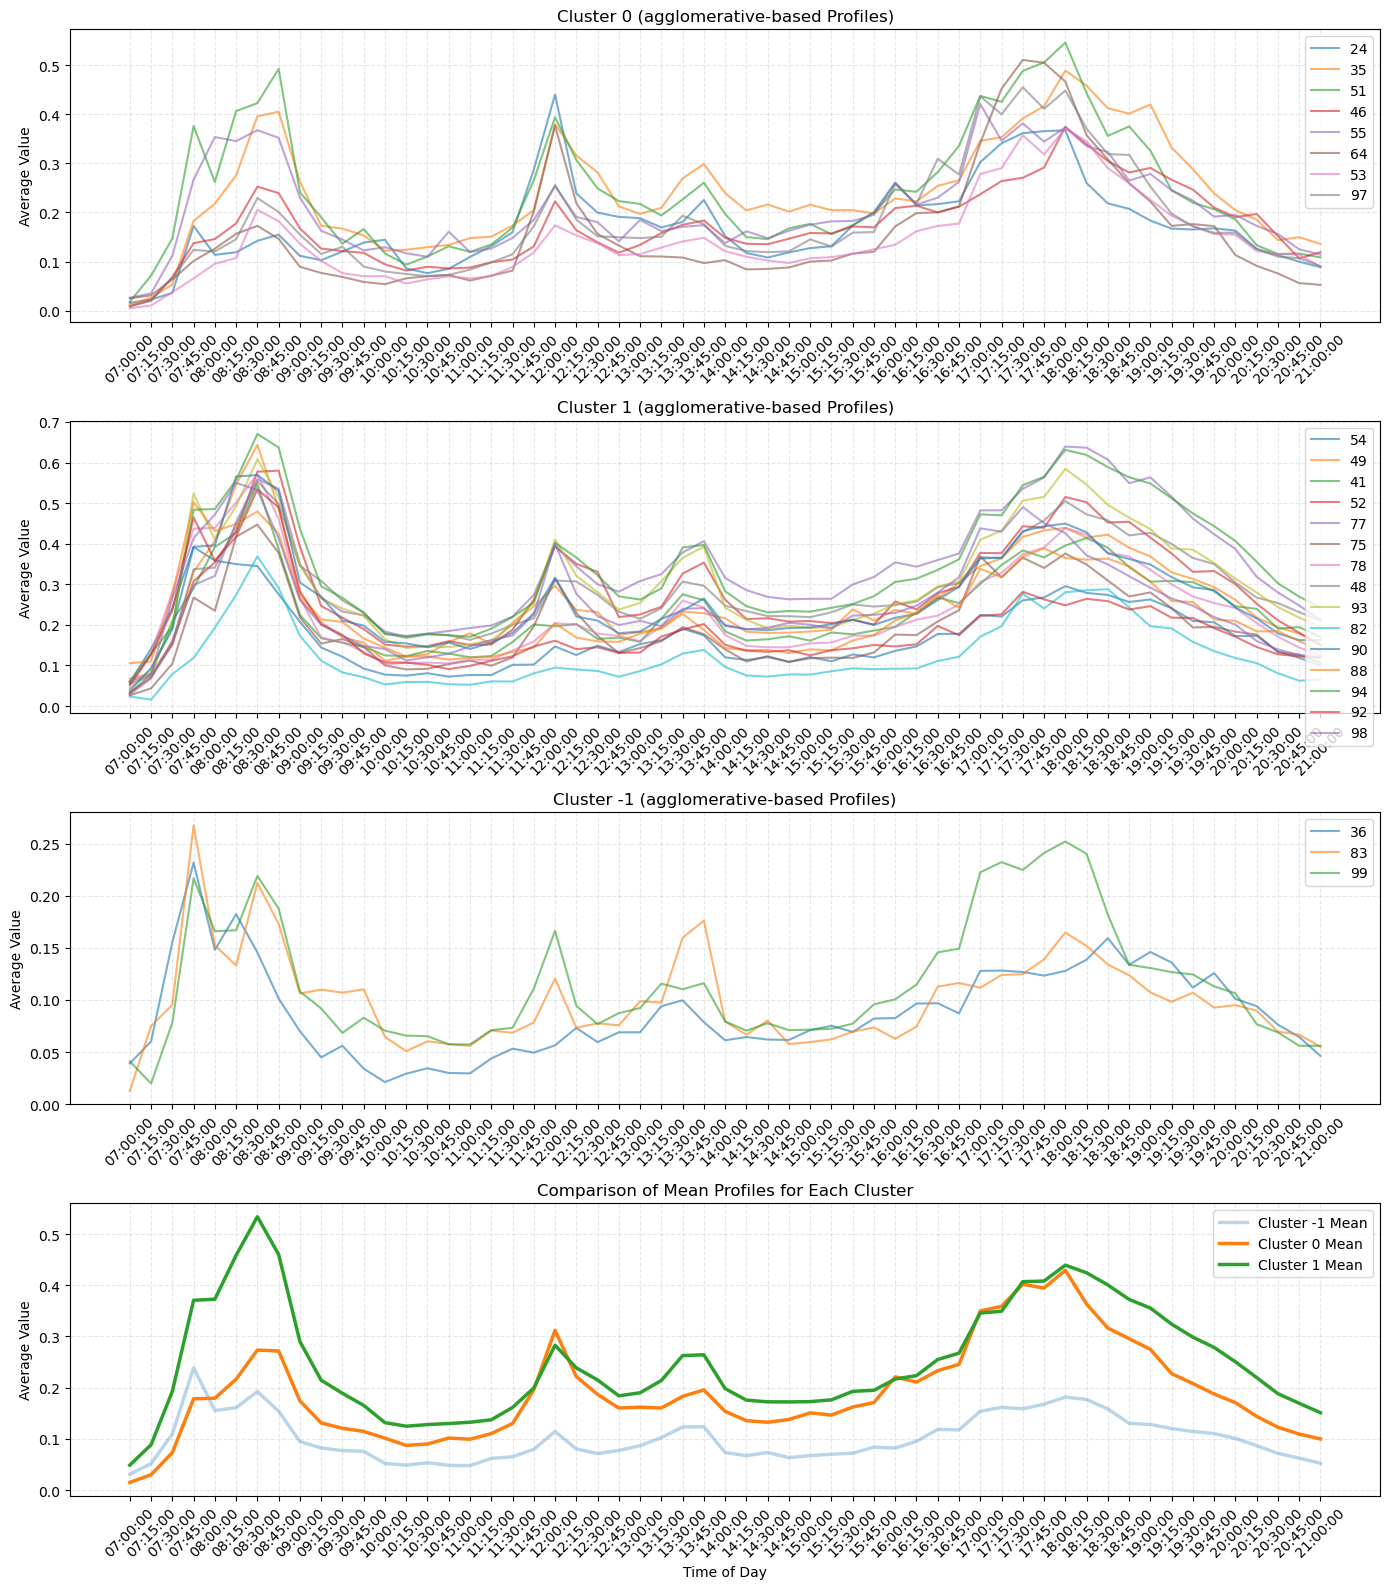

Model1 correspond to :  STAEformer_bike_out_calendar__e200_h4_bis
Model2 correspond to :  STAEformer_bike_out_weather_calendar_late_fusion_feature_extractor__e200_h4_bis


    Experiment: Exp2_rainy
Exp2_rainy
    Horizon h=4


FileNotFoundError: [Errno 2] No such file or directory: '/home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp2_rainy/bike_out_STAEformer/best_models/model_args.pkl'

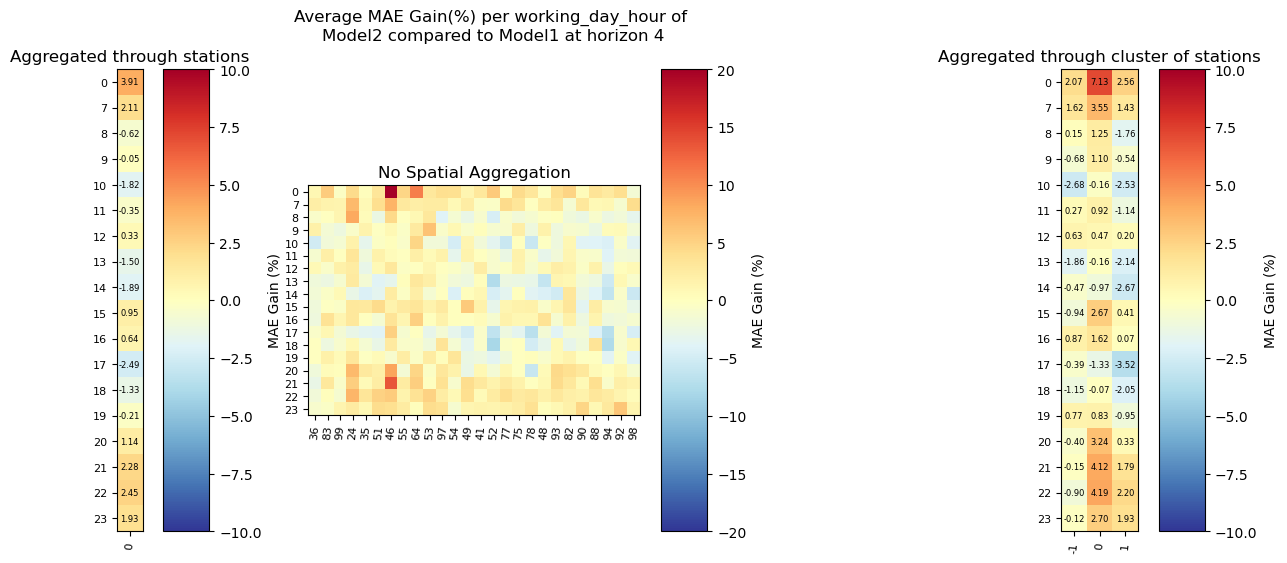

In [4]:
import os 
import sys

current_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_path,'..','..'))  # '..','..','..'
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from examples.accuracy_comparison import get_model_args,get_desagregated_comparison_plot
from experiences.common_results import dic_exp_to_names,dic_trials,find_baseline


issue_while_loading_saved_weights = ''

trial_id1_in_bis = False
trial_id2_in_bis = False
range_k = range(1,6) # range(1,6)
comparison_on_rainy_events = False 
station_clustering = True 

init_folder_path = f"/home/rrochas/prediction-validation/save/plot"

# ---- If folder does not exist in save:
for exp_i in dic_exp_to_names.keys():
    folder_path = f"{init_folder_path}/{exp_i}"
    if not os.path.exists(folder_path):
        os.mkdir(folder_path)


for exp_i,target_model_name in dic_exp_to_names.items():
    if exp_i == 'Exp2_rainy': 
        continue
    print('\n=========================')
    print(f"    Experiment: {exp_i}")
    target_data = '_'.join(target_model_name.split('_')[:-1])
    model_name = target_model_name.split('_')[-1]
    # if not (exp_i == 'Exp2'):
    #     continue

    print(exp_i)
    configs = dic_trials[exp_i]
    for h in [1,4]:
        baseline = find_baseline(exp_i,h=h)
        if (baseline in configs) and baseline.endswith(f"_h{h}"):
            print(f"    Horizon h={h}")
            trial_ids2 = [f"{config}_bis" for config in configs if (config.endswith(f"_h{h}")) and not(baseline == config)]
            trial_ids1 = [f"{baseline}_bis"]*len(trial_ids2)

            if exp_i == 'Exp4_15min_h1':
                exp_i = 'Exp4_15min'
            save_folder_name = f'{exp_i}/{target_data}_{model_name}'
            save_folder_name_bis = None

            model_args,model_args_bis,path_model_args,path_model_args_bis = get_model_args(save_folder_name,save_folder_name_bis)

            for trial_id in trial_ids2:
                print(trial_id)

            for trial_id1,trial_id2 in zip(trial_ids1[:1],trial_ids2[:1]):
                print('    trial_id1',trial_id1)
                print('    trial_id2',trial_id2)
                if comparison_on_rainy_events:
                    folder_path = f"{init_folder_path}/{exp_i}_rainy"
                else:
                    folder_path = f"{init_folder_path}/{exp_i}"
                save_name = f"desag_{trial_id2}"
                outputs = get_desagregated_comparison_plot(trial_id1,trial_id2,
                                                            model_args = model_args,
                                                            model_args_bis = model_args_bis,
                                                            path_model_args = path_model_args,
                                                            path_model_args_bis = path_model_args_bis,
                                                            range_k = range_k,
                                                            trial_id1_in_bis=False,
                                                            trial_id2_in_bis=False,
                                                            station = None,
                                                            comparison_on_rainy_events = comparison_on_rainy_events ,
                                                            station_clustering = station_clustering,
                                                            folder_path = None,
                                                            save_name = None,
                                                            heatmap = True,
                                                            daily_profile = True,
                                                            dendrogram = True
                                                            )
                clusterer,full_predict1,full_predict2,train_input,Y_true,L_trainers_1,L_trainers_2,ds1,ds2,args_init1,args_init2 = outputs

                if full_predict1 is None:
                    issue_while_loading_saved_weights +=  f"\nProblem for {trial_id1} vs {trial_id2} in {exp_i}"
                print(issue_while_loading_saved_weights)